# CSE603: Machine Learning - II

# Final - Project

# Analysis of Statistical Inference Methods vs Traditional ML 

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 31st January 2022

# Analysis on Datasets for Classification

# Classification Dataset # 2

# Importing Libraraies

In [1]:
import pandas as pd
import pymc3 as pm
import numpy as np
import theano.tensor as tt
import matplotlib.pyplot as plt

# %matplotlib inline
import arviz as az
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import graphviz
import os


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:


import lazypredict
from lazypredict.Supervised import LazyRegressor

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosis

from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA

import time

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline


import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder

import time


from numpy import mean



from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
import os

import matplotlib
import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import LassoCV
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score




cv = KFold(n_splits=10, random_state=1, shuffle=True)
# reg = LinearRegression()


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


from numpy.random import normal
from numpy.random import exponential
import random
import re

import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_selection import mutual_info_regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
pd.set_option('display.max_columns', 500)

from lazypredict.Supervised import LazyClassifier


## Getting Dataeset

In [7]:
df=pd.read_csv('Steel_industry_data.csv')
print(df.shape)
df.head()

(35040, 11)


date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                  0.00       0.00   
1                                  0.00       0.00   
2                                  0.00       0.00   
3                                  0.00       0.00   
4                                  0.00       0.00   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                        100.00   900   
1                         66.77                        100.00  1800   
2                         70.28                        100.00  2700   
3                         68.09                        100.00  3600   
4                         64.72                        100.00  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [8]:
df_c=df.copy()

In [9]:
df.Load_Type.value_counts()

Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64

In [10]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [11]:
df=df.drop(columns=['date','WeekStatus','Day_of_week'])

#### Changing the target label class into 1 and zero

In [12]:
def f1(v):
    if v=='Light_Load':
        return(0)
    elif v=='Medium_Load':
        return(1)
    elif v=='Maximum_Load':
        return(1)

df['Load_Type']=df['Load_Type'].apply(f1)

df.head()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0       3.17                                  2.95   
1       4.00                                  4.46   
2       3.24                                  3.28   
3       3.31                                  3.56   
4       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                  0.00       0.00   
1                                  0.00       0.00   
2                                  0.00       0.00   
3                                  0.00       0.00   
4                                  0.00       0.00   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  Load_Type  
0                         73.21                        100.00   900          0  
1                         66.77                        100.00  1800          0  
2                         70.28                        100.00  2700          0  
3                         68.09                        100.00  3600          0  
4                         64.72                        100.00  4500          0

In [13]:
df.Load_Type.value_counts()

0    18072
1    16968
Name: Load_Type, dtype: int64

### Data set details

### Datset Title: Steel Industry Energy Consumption Dataset Data Set

The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea. It produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.

The data was obtained from UCI Machine Learning Repository:

https://archive.ics.uci.edu/ml/datasets/Steel+Industry+Energy+Consumption+Dataset



#### Attribute Information:



Data Variables Type Measurement

Industry Energy Consumption Continuous kWh

Lagging Current reactive power Continuous kVarh

Leading Current reactive power Continuous kVarh

tCO2(CO2) Continuous ppm

Lagging Current power factor Continuous %

Leading Current Power factor Continuous %

Number of Seconds from midnight Continuous S

Week status Categorical (Weekend (0) or a Weekday(1))

Day of week Categorical Sunday, Monday â€¦. Saturday

Load Type Categorical Light Load, Medium Load, Maximum Load

## EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   Load_Type                             35040 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 2.1 MB


In [15]:
df.describe()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count   35040.00                              35040.00   
mean       27.39                                 13.04   
std        33.44                                 16.31   
min         0.00                                  0.00   
25%         3.20                                  2.30   
50%         4.57                                  5.00   
75%        51.24                                 22.64   
max       157.18                                 96.91   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
count                              35040.00   35040.00   
mean                                   3.87       0.01   
std                                    7.42       0.02   
min                                    0.00       0.00   
25%                                    0.00       0.00   
50%                                    0.00       0.00   
75%                                    2.09       0.02   
max                                   27.76       0.07   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor      NSM  \
count                      35040.00                      35040.00 35040.00   
mean                          80.58                         84.37 42750.00   
std                           18.92                         30.46 24940.53   
min                            0.00                          0.00     0.00   
25%                           63.32                         99.70 21375.00   
50%                           87.96                        100.00 42750.00   
75%                           99.02                        100.00 64125.00   
max                          100.00                        100.00 85500.00   

       Load_Type  
count   35040.00  
mean        0.48  
std         0.50  
min         0.00  
25%         0.00  
50%         0.00  
75%         1.00  
max         1.00

[None, None, None, None, None, None, None, None, None]

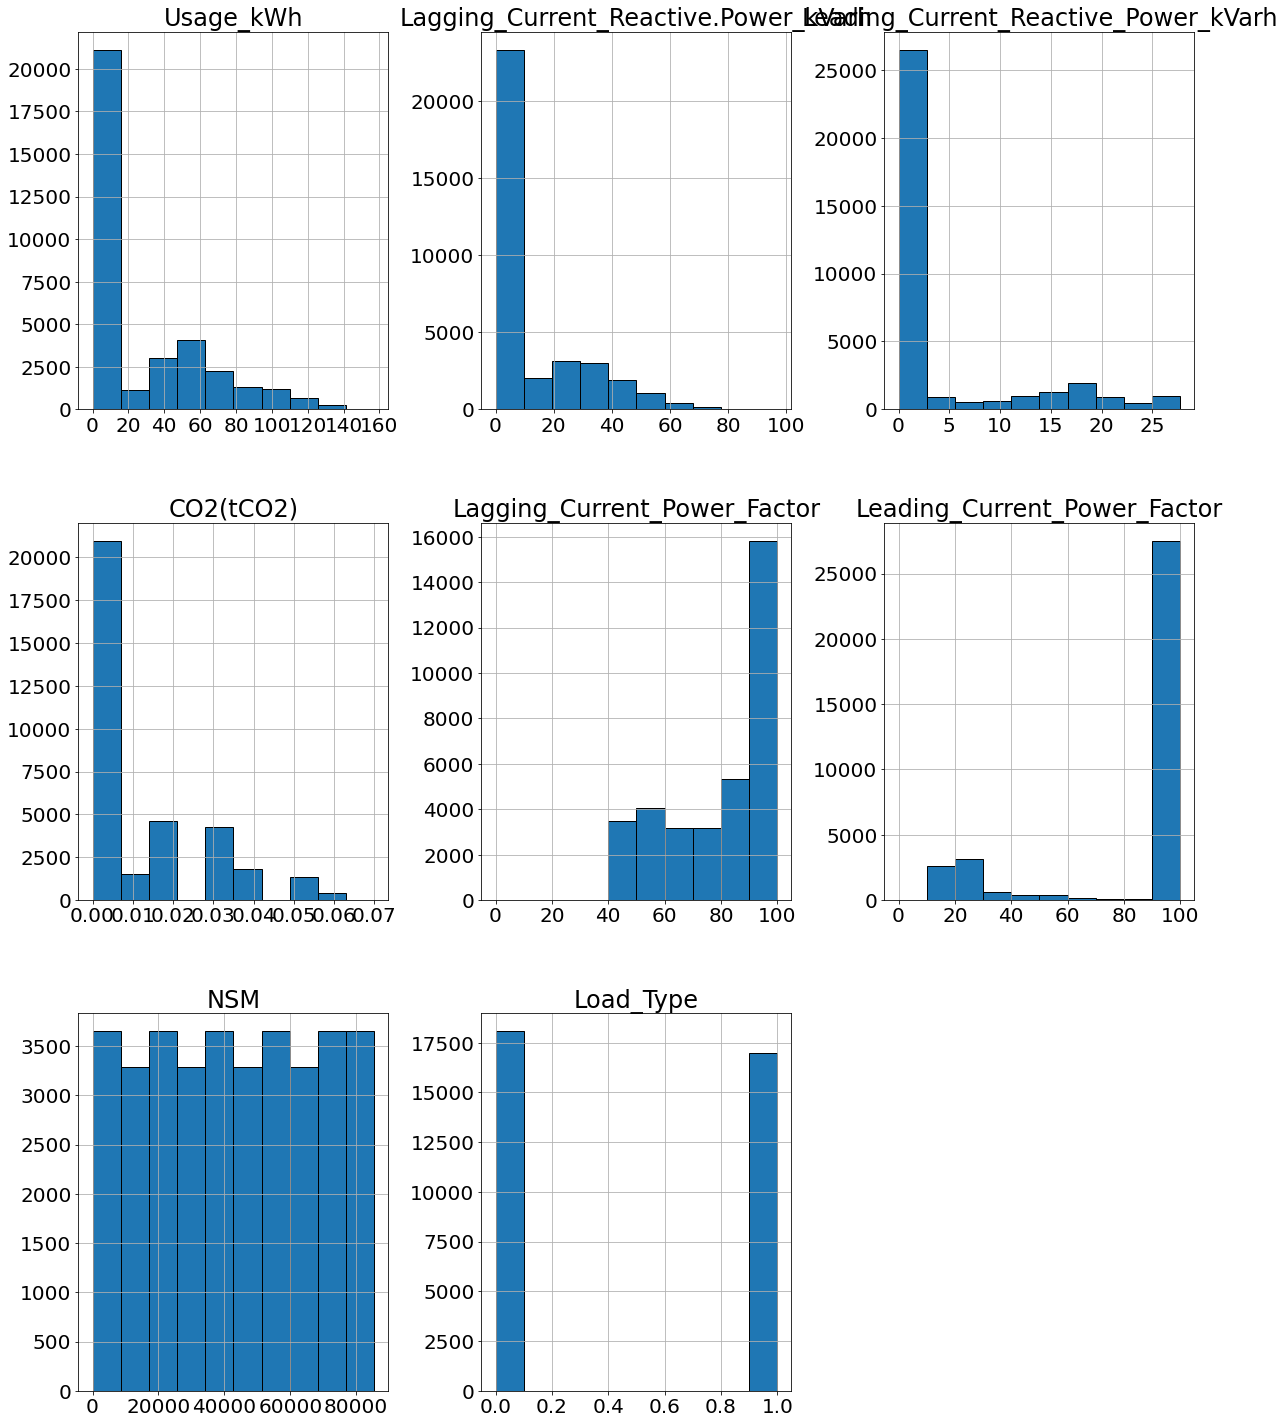

In [16]:
%matplotlib inline

fig= df.hist(xlabelsize=20,ylabelsize=20,ec="k",figsize=(20,25))
[x.title.set_size(24) for x in fig.ravel()]


All the features are highly skewed

In [17]:
df.isna().sum()

Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
Load_Type                               0
dtype: int64

#### Dropping the NaN values

In [18]:
print(df.shape)
df=df.dropna()
df.shape

(35040, 8)


(35040, 8)

### Applying log transformation with add 1 to make the dataset distributions more towards normal distribution and rescale the features within range and resuces the skewness from the dataset

In [20]:
df_log=np.log1p(df)

#### Applying standard scaling

In [21]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()
X2_Scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X2_Scaled)
df_scaled.columns = df.columns


after applying log transformation the features have become more normally distributed

In [23]:
df_log.corr()

Usage_kWh  \
Usage_kWh                                  1.00   
Lagging_Current_Reactive.Power_kVarh       0.76   
Leading_Current_Reactive_Power_kVarh      -0.30   
CO2(tCO2)                                  0.94   
Lagging_Current_Power_Factor               0.49   
Leading_Current_Power_Factor               0.37   
NSM                                        0.28   
Load_Type                                  0.67   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                             0.76   
Lagging_Current_Reactive.Power_kVarh                                  1.00   
Leading_Current_Reactive_Power_kVarh                                 -0.77   
CO2(tCO2)                                                             0.78   
Lagging_Current_Power_Factor                                         -0.11   
Leading_Current_Power_Factor                                          0.71   
NSM                                                                  -0.01   
Load_Type                                                             0.27   

                                      Leading_Current_Reactive_Power_kVarh  \
Usage_kWh                                                            -0.30   
Lagging_Current_Reactive.Power_kVarh                                 -0.77   
Leading_Current_Reactive_Power_kVarh                                  1.00   
CO2(tCO2)                                                            -0.34   
Lagging_Current_Power_Factor                                          0.54   
Leading_Current_Power_Factor                                         -0.93   
NSM                                                                   0.28   
Load_Type                                                             0.14   

                                      CO2(tCO2)  Lagging_Current_Power_Factor  \
Usage_kWh                                  0.94                          0.49   
Lagging_Current_Reactive.Power_kVarh       0.78                         -0.11   
Leading_Current_Reactive_Power_kVarh      -0.34                          0.54   
CO2(tCO2)                                  1.00                          0.40   
Lagging_Current_Power_Factor               0.40                          1.00   
Leading_Current_Power_Factor               0.35                         -0.46   
NSM                                        0.24                          0.43   
Load_Type                                  0.58                          0.58   

                                      Leading_Current_Power_Factor   NSM  \
Usage_kWh                                                     0.37  0.28   
Lagging_Current_Reactive.Power_kVarh                          0.71 -0.01   
Leading_Current_Reactive_Power_kVarh                         -0.93  0.28   
CO2(tCO2)                                                     0.35  0.24   
Lagging_Current_Power_Factor                                 -0.46  0.43   
Leading_Current_Power_Factor                                  1.00 -0.24   
NSM                                                          -0.24  1.00   
Load_Type                                                    -0.03  0.45   

                                      Load_Type  
Usage_kWh                                  0.67  
Lagging_Current_Reactive.Power_kVarh       0.27  
Leading_Current_Reactive_Power_kVarh       0.14  
CO2(tCO2)                                  0.58  
Lagging_Current_Power_Factor               0.58  
Leading_Current_Power_Factor              -0.03  
NSM                                        0.45  
Load_Type                                  1.00

## Correlation

In [24]:
df.corr()

Usage_kWh  \
Usage_kWh                                  1.00   
Lagging_Current_Reactive.Power_kVarh       0.90   
Leading_Current_Reactive_Power_kVarh      -0.32   
CO2(tCO2)                                  0.99   
Lagging_Current_Power_Factor               0.39   
Leading_Current_Power_Factor               0.35   
NSM                                        0.23   
Load_Type                                  0.58   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                             0.90   
Lagging_Current_Reactive.Power_kVarh                                  1.00   
Leading_Current_Reactive_Power_kVarh                                 -0.41   
CO2(tCO2)                                                             0.89   
Lagging_Current_Power_Factor                                          0.14   
Leading_Current_Power_Factor                                          0.41   
NSM                                                                   0.08   
Load_Type                                                             0.38   

                                      Leading_Current_Reactive_Power_kVarh  \
Usage_kWh                                                            -0.32   
Lagging_Current_Reactive.Power_kVarh                                 -0.41   
Leading_Current_Reactive_Power_kVarh                                  1.00   
CO2(tCO2)                                                            -0.33   
Lagging_Current_Power_Factor                                          0.53   
Leading_Current_Power_Factor                                         -0.94   
NSM                                                                   0.37   
Load_Type                                                             0.13   

                                      CO2(tCO2)  Lagging_Current_Power_Factor  \
Usage_kWh                                  0.99                          0.39   
Lagging_Current_Reactive.Power_kVarh       0.89                          0.14   
Leading_Current_Reactive_Power_kVarh      -0.33                          0.53   
CO2(tCO2)                                  1.00                          0.38   
Lagging_Current_Power_Factor               0.38                          1.00   
Leading_Current_Power_Factor               0.36                         -0.52   
NSM                                        0.23                          0.57   
Load_Type                                  0.57                          0.59   

                                      Leading_Current_Power_Factor   NSM  \
Usage_kWh                                                     0.35  0.23   
Lagging_Current_Reactive.Power_kVarh                          0.41  0.08   
Leading_Current_Reactive_Power_kVarh                         -0.94  0.37   
CO2(tCO2)                                                     0.36  0.23   
Lagging_Current_Power_Factor                                 -0.52  0.57   
Leading_Current_Power_Factor                                  1.00 -0.36   
NSM                                                          -0.36  1.00   
Load_Type                                                    -0.04  0.59   

                                      Load_Type  
Usage_kWh                                  0.58  
Lagging_Current_Reactive.Power_kVarh       0.38  
Leading_Current_Reactive_Power_kVarh       0.13  
CO2(tCO2)                                  0.57  
Lagging_Current_Power_Factor               0.59  
Leading_Current_Power_Factor              -0.04  
NSM                                        0.59  
Load_Type                                  1.00

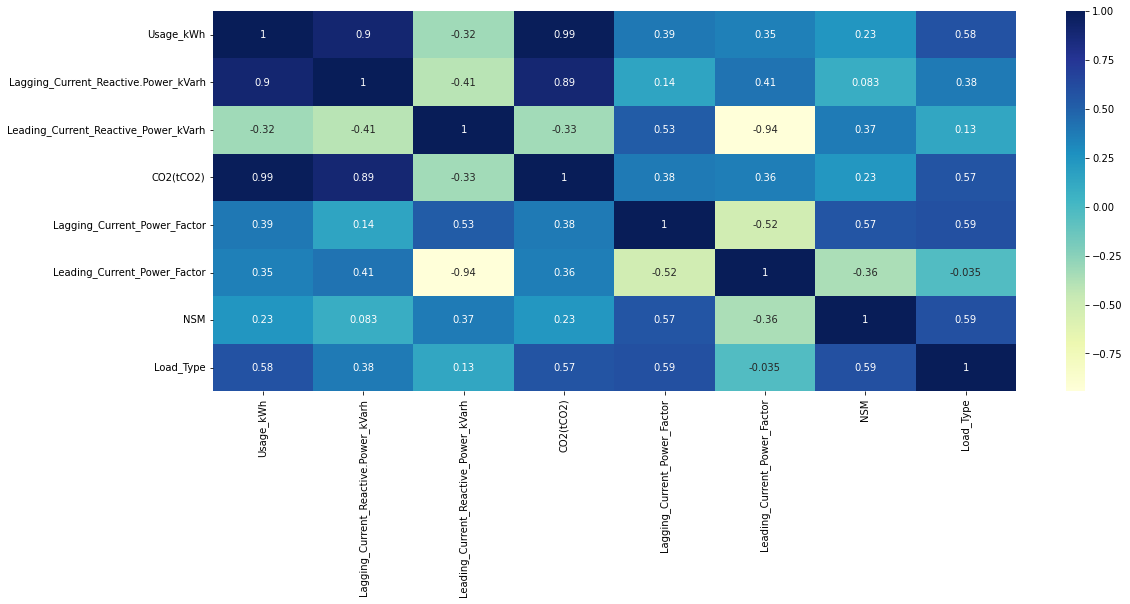

In [25]:
cor=df.corr()
plt.figure(figsize=(18, 7))
dataplot = sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Feature Selection

In [26]:
df.isna().sum()

Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
Load_Type                               0
dtype: int64

### for df_scaled

In [27]:
df.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Load_Type'],
      dtype='object')

In [28]:
dfs = pd.DataFrame()


X=df_scaled.drop(columns=['Load_Type'])
y=df['Load_Type']



trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_classif(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)


dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestClassifier(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingClassifier(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeClassifier(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df_log.corr()


cor_target = abs(cor['Load_Type'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)

dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

# dfs['SVM']=importance_svm

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


MI  Decission_Tree  Random_Forrest  \
NSM                                  0.42            0.76            0.56   
Usage_kWh                            0.30            0.24            0.26   
Lagging_Current_Power_Factor         0.33            0.00            0.11   
CO2(tCO2)                            0.23            0.00            0.05   
Lagging_Current_Reactive.Power_kVarh 0.26            0.00            0.01   
Leading_Current_Reactive_Power_kVarh 0.05            0.00            0.01   
Leading_Current_Power_Factor         0.04            0.00            0.01   

                                      Gradient_Boosting  Correlation_Default  \
NSM                                                0.73                 0.45   
Usage_kWh                                          0.27                 0.67   
Lagging_Current_Power_Factor                       0.00                 0.58   
CO2(tCO2)                                          0.00                 0.58   
Lagging_Current_Reactive.Power_kVarh               0.00                 0.27   
Leading_Current_Reactive_Power_kVarh               0.00                 0.14   
Leading_Current_Power_Factor                       0.00                 0.03   

                                      sum  
NSM                                  2.92  
Usage_kWh                            1.73  
Lagging_Current_Power_Factor         1.03  
CO2(tCO2)                            0.85  
Lagging_Current_Reactive.Power_kVarh 0.54  
Leading_Current_Reactive_Power_kVarh 0.20  
Leading_Current_Power_Factor         0.07

#### for df_log

In [29]:
dfs = pd.DataFrame()


X=df_log.drop(columns=['Load_Type'])
y=df['Load_Type']


trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_regression(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)


dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingRegressor(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeRegressor(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df_log.corr()


cor_target = abs(cor['Load_Type'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)

dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

# dfs['SVM']=importance_svm

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


MI  Decission_Tree  Random_Forrest  \
NSM                                  0.42            0.76            0.59   
Usage_kWh                            0.30            0.24            0.24   
Lagging_Current_Power_Factor         0.33            0.00            0.10   
CO2(tCO2)                            0.23            0.00            0.05   
Lagging_Current_Reactive.Power_kVarh 0.27            0.00            0.01   
Leading_Current_Reactive_Power_kVarh 0.04            0.00            0.01   
Leading_Current_Power_Factor         0.03            0.00            0.01   

                                      Gradient_Boosting  Correlation_Default  \
NSM                                                0.73                 0.45   
Usage_kWh                                          0.26                 0.67   
Lagging_Current_Power_Factor                       0.00                 0.58   
CO2(tCO2)                                          0.00                 0.58   
Lagging_Current_Reactive.Power_kVarh              -0.00                 0.27   
Leading_Current_Reactive_Power_kVarh               0.00                 0.14   
Leading_Current_Power_Factor                       0.00                 0.03   

                                      sum  
NSM                                  2.96  
Usage_kWh                            1.70  
Lagging_Current_Power_Factor         1.01  
CO2(tCO2)                            0.86  
Lagging_Current_Reactive.Power_kVarh 0.55  
Leading_Current_Reactive_Power_kVarh 0.19  
Leading_Current_Power_Factor         0.07

#### after using log transformation there are some errors of Nan and infinity in features selection hence we will not use df_log fruther

#### for df

In [30]:
dfs = pd.DataFrame()


X=df.drop(columns=['Load_Type'])
y=df['Load_Type']


trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_regression(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)

dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingRegressor(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeRegressor(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df_log.corr()


cor_target = abs(cor['Load_Type'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)

dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB


dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


MI  Decission_Tree  Random_Forrest  \
NSM                                  0.43            0.76            0.56   
Usage_kWh                            0.30            0.24            0.28   
Lagging_Current_Power_Factor         0.33            0.00            0.08   
CO2(tCO2)                            0.23            0.00            0.04   
Lagging_Current_Reactive.Power_kVarh 0.26            0.00            0.01   
Leading_Current_Reactive_Power_kVarh 0.05            0.00            0.01   
Leading_Current_Power_Factor         0.03            0.00            0.01   

                                      Gradient_Boosting  Correlation_Default  \
NSM                                                0.73                 0.45   
Usage_kWh                                          0.26                 0.67   
Lagging_Current_Power_Factor                       0.00                 0.58   
CO2(tCO2)                                          0.00                 0.58   
Lagging_Current_Reactive.Power_kVarh               0.00                 0.27   
Leading_Current_Reactive_Power_kVarh               0.00                 0.14   
Leading_Current_Power_Factor                       0.00                 0.03   

                                      sum  
NSM                                  2.94  
Usage_kWh                            1.75  
Lagging_Current_Power_Factor         1.00  
CO2(tCO2)                            0.85  
Lagging_Current_Reactive.Power_kVarh 0.54  
Leading_Current_Reactive_Power_kVarh 0.20  
Leading_Current_Power_Factor         0.07

In [31]:
dfs.shape

(7, 6)

In [32]:
dfs_s=dfs[dfs['sum']>0.9]
dfs_s.shape

(3, 6)

In [33]:
dfs_s

MI  Decission_Tree  Random_Forrest  \
Usage_kWh                    0.30            0.24            0.28   
Lagging_Current_Power_Factor 0.33            0.00            0.08   
NSM                          0.43            0.76            0.56   

                              Gradient_Boosting  Correlation_Default  sum  
Usage_kWh                                  0.26                 0.67 1.75  
Lagging_Current_Power_Factor               0.00                 0.58 1.00  
NSM                                        0.73                 0.45 2.94

In [34]:
dfs_s.index

Index(['Usage_kWh', 'Lagging_Current_Power_Factor', 'NSM'], dtype='object')

### chosing the best top 3 features

In [35]:
# df_t=df[dfs_s.index]

df_ts=df_scaled[dfs_s.index] # scaled dataset

df_t=df[dfs_s.index] 

df_tl=df_log[dfs_s.index]

## Making X,y

## Making train and test split

In [36]:
df.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Load_Type'],
      dtype='object')

In [37]:
X.shape

(35040, 7)

#### for df

In [38]:

X=df_t
y=df['Load_Type']
# y=df_log['SSPL']

# reduce X,y

reduce= int(X.shape[0] * 0.05)

X,y = X[:reduce], y[:reduce]


offset = int(X.shape[0] * 0.7)

### splitting dataset into training and testing part.
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)



In [39]:
X.shape

(1752, 3)

In [40]:
y_train.shape

(1226,)

In [41]:
X_train.shape

(1226, 3)

In [42]:
Xl=df_tl
yl=df_scaled['Load_Type']

# reduce Xs,ys

reduce= int(Xl.shape[0] * 0.05)

Xl,yl = Xl[:reduce], yl[:reduce]


offset = int(Xl.shape[0] * 0.7)

### splitting dataset into training and testing part.
Xl_train, yl_train = Xl[:offset], yl[:offset]
Xl_test, yl_test = Xl[offset:], yl[offset:]

In [43]:
Xl_train.shape

(1226, 3)

#### for df_scaled

In [44]:
Xs=df_ts
ys=df_scaled['Load_Type']

# reduce Xs,ys

reduce= int(Xs.shape[0] * 0.05)

Xs,ys = Xs[:reduce], ys[:reduce]


offset = int(Xs.shape[0] * 0.7)

### splitting dataset into training and testing part.
Xs_train, ys_train = Xs[:offset], ys[:offset]
Xs_test, ys_test = Xs[offset:], ys[offset:]

In [45]:
Xs_train.shape

(1226, 3)

In [46]:
df_t.describe()

Usage_kWh  Lagging_Current_Power_Factor      NSM
count   35040.00                      35040.00 35040.00
mean       27.39                         80.58 42750.00
std        33.44                         18.92 24940.53
min         0.00                          0.00     0.00
25%         3.20                         63.32 21375.00
50%         4.57                         87.96 42750.00
75%        51.24                         99.02 64125.00
max       157.18                        100.00 85500.00

In [47]:
df_ts.describe()

Usage_kWh  Lagging_Current_Power_Factor      NSM
count   35040.00                      35040.00 35040.00
mean        0.00                         -0.00    -0.00
std         1.00                          1.00     1.00
min        -0.82                         -4.26    -1.71
25%        -0.72                         -0.91    -0.86
50%        -0.68                          0.39     0.00
75%         0.71                          0.97     0.86
max         3.88                          1.03     1.71

In [48]:
X.describe()

Usage_kWh  Lagging_Current_Power_Factor      NSM
count    1752.00                       1752.00  1752.00
mean       38.93                         84.93 42318.49
std        45.27                         13.23 25055.70
min         3.10                         53.26     0.00
25%         4.57                         71.57 20700.00
50%         5.20                         89.99 42300.00
75%        75.82                         96.42 63900.00
max       153.14                        100.00 85500.00

In [49]:
Xs.describe()

Usage_kWh  Lagging_Current_Power_Factor     NSM
count    1752.00                       1752.00 1752.00
mean        0.35                          0.23   -0.02
std         1.35                          0.70    1.00
min        -0.73                         -1.44   -1.71
25%        -0.68                         -0.48   -0.88
50%        -0.66                          0.50   -0.02
75%         1.45                          0.84    0.85
max         3.76                          1.03    1.71

In [50]:
X_train.shape

(1226, 3)

In [51]:
X_test.shape

(526, 3)

In [52]:
X.shape

(1752, 3)

In [53]:
X_train.shape

(1226, 3)

## Using Lazy predict to rub regression models

### Making prediction on train-test dataset with lazy predict for df

In [55]:

reg = LazyClassifier(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(X_train, X_test, y_train, y_test)


print(models_1)


 31%|███       | 9/29 [00:00<00:00, 34.11it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9961977186311787, 'Balanced Accuracy': 0.9966442953020134, 'ROC AUC': 0.9966442953020134, 'F1 Score': 0.9961996194084793, 'Time taken': 0.07005691528320312}
{'Model': 'BaggingClassifier', 'Accuracy': 0.9790874524714829, 'Balanced Accuracy': 0.9784528435181914, 'ROC AUC': 0.9784528435181914, 'F1 Score': 0.9790819863464455, 'Time taken': 0.020926713943481445}
{'Model': 'BernoulliNB', 'Accuracy': 0.9068441064638784, 'Balanced Accuracy': 0.9074826327563876, 'ROC AUC': 0.9074826327563875, 'F1 Score': 0.9070314728266535, 'Time taken': 0.007509708404541016}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.8783269961977186, 'Balanced Accuracy': 0.8859207582715177, 'ROC AUC': 0.8859207582715177, 'F1 Score': 0.8788637395285255, 'Time taken': 0.029324769973754883}
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9790874524714829, 'Balanced Accuracy': 0.97

 62%|██████▏   | 18/29 [00:00<00:00, 37.31it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.8954372623574145, 'Balanced Accuracy': 0.9041122100553397, 'ROC AUC': 0.9041122100553397, 'F1 Score': 0.8958879850541609, 'Time taken': 0.027734756469726562}
{'Model': 'LabelSpreading', 'Accuracy': 0.8859315589353612, 'Balanced Accuracy': 0.8957229483103732, 'ROC AUC': 0.8957229483103732, 'F1 Score': 0.8863876674429141, 'Time taken': 0.04163098335266113}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.8631178707224335, 'Balanced Accuracy': 0.868892028729542, 'ROC AUC': 0.868892028729542, 'F1 Score': 0.8637226284148585, 'Time taken': 0.01064443588256836}
{'Model': 'LinearSVC', 'Accuracy': 0.876425855513308, 'Balanced Accuracy': 0.8842429059225245, 'ROC AUC': 0.8842429059225245, 'F1 Score': 0.8769677235316763, 'Time taken': 0.016627073287963867}
{'Model': 'LogisticRegression', 'Accuracy': 0.8745247148288974, 'Balanced Accuracy': 0.881534793359237, 'ROC AUC': 0.8815347933592371, 'F1 Score': 0.8750821398762603, 'Time taken': 0.0127446651458


 76%|███████▌  | 22/29 [00:00<00:00, 32.19it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9752851711026616, 'Balanced Accuracy': 0.976127399034499, 'ROC AUC': 0.976127399034499, 'F1 Score': 0.9753146528053959, 'Time taken': 0.1343991756439209}
{'Model': 'RidgeClassifier', 'Accuracy': 0.8631178707224335, 'Balanced Accuracy': 0.868892028729542, 'ROC AUC': 0.868892028729542, 'F1 Score': 0.8637226284148585, 'Time taken': 0.014960527420043945}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.8650190114068441, 'Balanced Accuracy': 0.8710850111856823, 'ROC AUC': 0.8710850111856823, 'F1 Score': 0.8656176586881419, 'Time taken': 0.011058807373046875}
{'Model': 'SGDClassifier', 'Accuracy': 0.8954372623574145, 'Balanced Accuracy': 0.9015365595196043, 'ROC AUC': 0.9015365595196044, 'F1 Score': 0.8958966992195826, 'Time taken': 0.015424489974975586}
{'Model': 'SVC', 'Accuracy': 0.8650190114068441, 'Balanced Accuracy': 0.877266572471447, 'ROC AUC': 0.877266572471447, 'F1 Score': 0.8653807415350053, 'Time taken': 0.029214859008789062}
Stacking

100%|██████████| 29/29 [00:01<00:00, 27.69it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.9790874524714829, 'Balanced Accuracy': 0.9784528435181914, 'ROC AUC': 0.9784528435181914, 'F1 Score': 0.9790819863464455, 'Time taken': 0.23179078102111816}
{'Model': 'LGBMClassifier', 'Accuracy': 0.9790874524714829, 'Balanced Accuracy': 0.9784528435181914, 'ROC AUC': 0.9784528435181914, 'F1 Score': 0.9790819863464455, 'Time taken': 0.12191557884216309}
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
DecisionTreeClassifier             0.98               0.98     0.98      0.98   
XGBClassifier                      0.98               0.98     0.98      0.98   
BaggingClassifier                  0.98               0.98     0.98      0.98   
LGBMClassifier                     0.98               0.98     0.98      0.98   
RandomForestClassifier             0

### Lazy predict for df_scaled

In [57]:


reg = LazyClassifier(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(Xs_train, Xs_test, y_train, y_test)

# models_1, predictions = reg.fit(X, X, y, y)

print(models_1)



 31%|███       | 9/29 [00:00<00:00, 31.43it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9961977186311787, 'Balanced Accuracy': 0.9966442953020134, 'ROC AUC': 0.9966442953020134, 'F1 Score': 0.9961996194084793, 'Time taken': 0.07848429679870605}
{'Model': 'BaggingClassifier', 'Accuracy': 0.9790874524714829, 'Balanced Accuracy': 0.9784528435181914, 'ROC AUC': 0.9784528435181914, 'F1 Score': 0.9790819863464455, 'Time taken': 0.02077174186706543}
{'Model': 'BernoulliNB', 'Accuracy': 0.9068441064638784, 'Balanced Accuracy': 0.9074826327563876, 'ROC AUC': 0.9074826327563875, 'F1 Score': 0.9070314728266535, 'Time taken': 0.006602048873901367}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.8783269961977186, 'Balanced Accuracy': 0.8859207582715177, 'ROC AUC': 0.8859207582715177, 'F1 Score': 0.8788637395285255, 'Time taken': 0.033254146575927734}
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9790874524714829, 'Balanced Accuracy': 0.978

 62%|██████▏   | 18/29 [00:00<00:00, 35.27it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.8954372623574145, 'Balanced Accuracy': 0.9041122100553397, 'ROC AUC': 0.9041122100553397, 'F1 Score': 0.8958879850541609, 'Time taken': 0.03119349479675293}
{'Model': 'LabelSpreading', 'Accuracy': 0.8859315589353612, 'Balanced Accuracy': 0.8957229483103732, 'ROC AUC': 0.8957229483103732, 'F1 Score': 0.8863876674429141, 'Time taken': 0.04770302772521973}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.8631178707224335, 'Balanced Accuracy': 0.868892028729542, 'ROC AUC': 0.868892028729542, 'F1 Score': 0.8637226284148585, 'Time taken': 0.01832127571105957}
{'Model': 'LinearSVC', 'Accuracy': 0.876425855513308, 'Balanced Accuracy': 0.8842429059225245, 'ROC AUC': 0.8842429059225245, 'F1 Score': 0.8769677235316763, 'Time taken': 0.021784305572509766}
{'Model': 'LogisticRegression', 'Accuracy': 0.8745247148288974, 'Balanced Accuracy': 0.881534793359237, 'ROC AUC': 0.8815347933592371, 'F1 Score': 0.8750821398762603, 'Time taken': 0.01176023483276


 76%|███████▌  | 22/29 [00:00<00:00, 33.11it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9752851711026616, 'Balanced Accuracy': 0.976127399034499, 'ROC AUC': 0.976127399034499, 'F1 Score': 0.9753146528053959, 'Time taken': 0.11261439323425293}
{'Model': 'RidgeClassifier', 'Accuracy': 0.8631178707224335, 'Balanced Accuracy': 0.868892028729542, 'ROC AUC': 0.868892028729542, 'F1 Score': 0.8637226284148585, 'Time taken': 0.008416175842285156}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.8650190114068441, 'Balanced Accuracy': 0.8710850111856823, 'ROC AUC': 0.8710850111856823, 'F1 Score': 0.8656176586881419, 'Time taken': 0.008063793182373047}
{'Model': 'SGDClassifier', 'Accuracy': 0.8954372623574145, 'Balanced Accuracy': 0.9015365595196043, 'ROC AUC': 0.9015365595196044, 'F1 Score': 0.8958966992195826, 'Time taken': 0.011644124984741211}
{'Model': 'SVC', 'Accuracy': 0.8650190114068441, 'Balanced Accuracy': 0.877266572471447, 'ROC AUC': 0.877266572471447, 'F1 Score': 0.8653807415350053, 'Time taken': 0.022958755493164062}
Stackin


 97%|█████████▋| 28/29 [00:00<00:00, 29.24it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.9790874524714829, 'Balanced Accuracy': 0.9784528435181914, 'ROC AUC': 0.9784528435181914, 'F1 Score': 0.9790819863464455, 'Time taken': 0.20870637893676758}



100%|██████████| 29/29 [00:01<00:00, 25.67it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9790874524714829, 'Balanced Accuracy': 0.9784528435181914, 'ROC AUC': 0.9784528435181914, 'F1 Score': 0.9790819863464455, 'Time taken': 0.2567129135131836}
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
DecisionTreeClassifier             0.98               0.98     0.98      0.98   
XGBClassifier                      0.98               0.98     0.98      0.98   
BaggingClassifier                  0.98               0.98     0.98      0.98   
LGBMClassifier                     0.98               0.98     0.98      0.98   
RandomForestClassifier             0.98               0.98     0.98      0.98   
ExtraTreesClassifier               0.96               0.96     0.96      0.96   
ExtraTreeClassifier                0.95               0.95     0.95      

#### So we will use dataset without any scaling

### Making a datframe to store results

In [58]:
df_results_r1=pd.DataFrame(columns=['model_name','sampling/VI_method','Accuracy_train','AUC-ROC_train',
                                    'Accuracy_test','AUC-ROC_test','model_details'])

df_results_r1

Empty DataFrame
Columns: [model_name, sampling/VI_method, Accuracy_train, AUC-ROC_train, Accuracy_test, AUC-ROC_test, model_details]
Index: []

## Logistic Regression (ML)

### Making prediction on full dataset (no scaling) with Linear Regression on df

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LogisticRegression()
reg.fit(X_train, y_train)


## for train data

y_p=reg.predict(X_train)
md_probs = reg.predict_proba(X_train)
md_probs = md_probs[:,1]
md_auc_train = roc_auc_score(y_train, md_probs)
# md_auc_train = roc_auc_score(y_train, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for train data : ", md_auc_train)
accuracy_train=accuracy_score(y_train, y_p)
print('Logistic Regression accuracy for train data : ',accuracy_train)


# for test data

y_p=reg.predict(X_test)
md_probs = reg.predict_proba(X_test)
md_probs = md_probs[:,1]
md_auc_test = roc_auc_score(y_test, md_probs)
# md_auc_test = roc_auc_score(y_test, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
accuracy_test=accuracy_score(y_test, y_p)
print('Logistic Regression accuracy for test data: ',accuracy_test)


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'NA',
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,'model_details':reg},ignore_index=True)


Logistic Regression AUC-ROC for train data :  0.9302588420621049
Logistic Regression accuracy for train data :  0.8474714518760196
Logistic Regression AUC-ROC for test data :  0.8785617567408454
Logistic Regression accuracy for test data:  0.7718631178707225


In [61]:
df_results_r1

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.85   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test         model_details  
0           0.93           0.77          0.88  LogisticRegression()

### LR on train test split on df_scaled

In [62]:
from sklearn.linear_model import LinearRegression


# Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LogisticRegression()
reg.fit(Xs_train, y_train)


## for train data

y_p=reg.predict(Xs_train)
md_probs = reg.predict_proba(Xs_train)
md_probs = md_probs[:,1]
md_auc_train = roc_auc_score(y_train, md_probs)
# md_auc_train = roc_auc_score(y_train, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for train data : ", md_auc_train)
accuracy_train=accuracy_score(y_train, y_p)
print('Logistic Regression accuracy for train data : ',accuracy_train)


## for test data

y_p=reg.predict(Xs_test)
md_probs = reg.predict_proba(Xs_test)
md_probs = md_probs[:,1]
md_auc_test = roc_auc_score(y_test, md_probs)
# md_auc_test = roc_auc_score(y_test, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
accuracy_test=accuracy_score(y_test, y_p)
print('Logistic Regression accuracy for test data: ',accuracy_test)


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'NA',
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,'model_details':reg},ignore_index=True)


Logistic Regression AUC-ROC for train data :  0.9537423663710322
Logistic Regression accuracy for train data :  0.8735725938009788
Logistic Regression AUC-ROC for test data :  0.961438831979277
Logistic Regression accuracy for test data:  0.876425855513308


In [64]:
from sklearn.linear_model import LinearRegression


# Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LogisticRegression()
reg.fit(Xl_train, y_train)


## for train data

y_p=reg.predict(Xl_train)
md_probs = reg.predict_proba(Xl_train)
md_probs = md_probs[:,1]
md_auc_train = roc_auc_score(y_train, md_probs)
# md_auc_train = roc_auc_score(y_train, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for train data : ", md_auc_train)
accuracy_train=accuracy_score(y_train, y_p)
print('Logistic Regression accuracy for train data : ',accuracy_train)


## for test data

y_p=reg.predict(Xl_test)
md_probs = reg.predict_proba(Xl_test)
md_probs = md_probs[:,1]
md_auc_test = roc_auc_score(y_test, md_probs)
# md_auc_test = roc_auc_score(y_test, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
accuracy_test=accuracy_score(y_test, y_p)
print('Logistic Regression accuracy for test data: ',accuracy_test)


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'NA',
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,'model_details':reg},ignore_index=True)


Logistic Regression AUC-ROC for train data :  0.9723678815735527
Logistic Regression accuracy for train data :  0.8947797716150081
Logistic Regression AUC-ROC for test data :  0.9526521841516543
Logistic Regression accuracy for test data:  0.8498098859315589


In [65]:
df_results_r1

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.85   
1  Logistic Regression-tain/test dataste                 NA            0.87   
2  Logistic Regression-tain/test dataste                 NA            0.89   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test         model_details  
0           0.93           0.77          0.88  LogisticRegression()  
1           0.95           0.88          0.96  LogisticRegression()  
2           0.97           0.85          0.95  LogisticRegression()

array([[<AxesSubplot:title={'center':'Usage_kWh'}>,
        <AxesSubplot:title={'center':'Lagging_Current_Power_Factor'}>],
       [<AxesSubplot:title={'center':'NSM'}>, <AxesSubplot:>]],
      dtype=object)

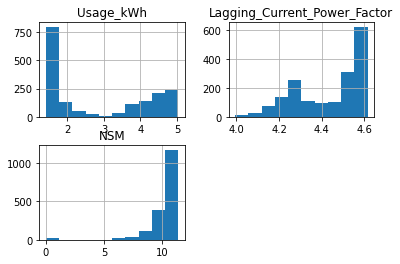

In [66]:
Xl.hist()

array([[<AxesSubplot:title={'center':'Usage_kWh'}>,
        <AxesSubplot:title={'center':'Lagging_Current_Power_Factor'}>],
       [<AxesSubplot:title={'center':'NSM'}>, <AxesSubplot:>]],
      dtype=object)

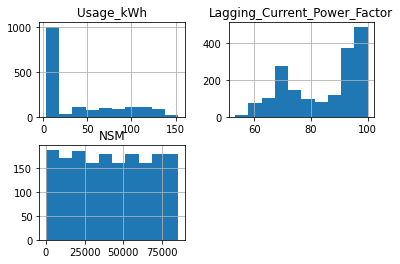

In [67]:
X.hist()

array([[<AxesSubplot:title={'center':'Usage_kWh'}>,
        <AxesSubplot:title={'center':'Lagging_Current_Power_Factor'}>],
       [<AxesSubplot:title={'center':'NSM'}>, <AxesSubplot:>]],
      dtype=object)

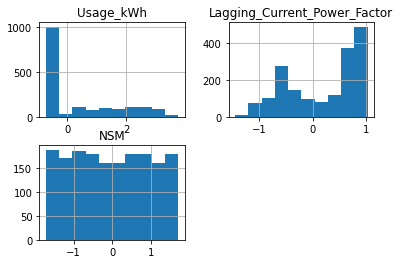

In [68]:
Xs.hist()

#### we will use normal df dataset without any scaling

#### Making variables for pymc models

In [70]:

Xv=X.values
yv=y.values
Xv_train=X_train.values
Xv_test=X_test.values
print(Xv_train.shape,Xv_test.shape)

yv_train=y_train.values
yv_test=y_test.values
print(yv_train.shape,yv_test.shape)


(1226, 3) (526, 3)
(1226,) (526,)


In [71]:
Xs.shape

(1752, 3)

In [72]:
Xsv=Xs.values
ysv=y.values
Xsv_train=Xs_train.values
Xsv_test=Xs_test.values
print(Xsv_train.shape,Xsv_test.shape)

ysv_train=ys_train.values
ysv_test=ys_test.values

(1226, 3) (526, 3)


In [73]:
Xlv=Xl.values
ylv=y.values
Xlv_train=Xl_train.values
Xlv_test=Xl_test.values
print(Xlv_train.shape,Xlv_test.shape)

ylv_train=yl_train.values
ylv_test=yl_test.values

(1226, 3) (526, 3)


### making vars for prior for each feature for df

In [74]:
X.columns

Index(['Usage_kWh', 'Lagging_Current_Power_Factor', 'NSM'], dtype='object')

### making vars for prior for each feature for df_scaled

### Selection of priors



## Applying MCMC

#### Note: We have used slice as the starting  sampling method to chose our best prior as it is the fastest sampler and as NUTS was giving chain breaking error

### Doing Logistic Regression using MCMC

In [75]:
yv_train.shape

(1226,)

#### Using generic priors

In [76]:
Xv_train.shape

(1226, 3)

### Generic prior 1

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 26 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.953709997626292
Logistic Regression accuracy :  0.8743882544861338
Logistic Regression accuracy for test data :  0.5665399239543726
Logistic Regression AUC-ROC for test data :  0.9377428470505123


'0.87'

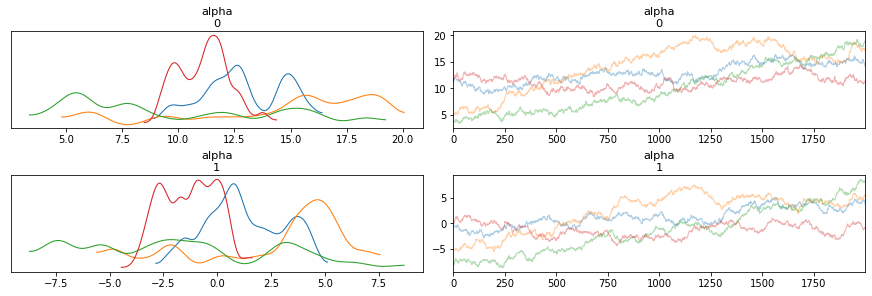

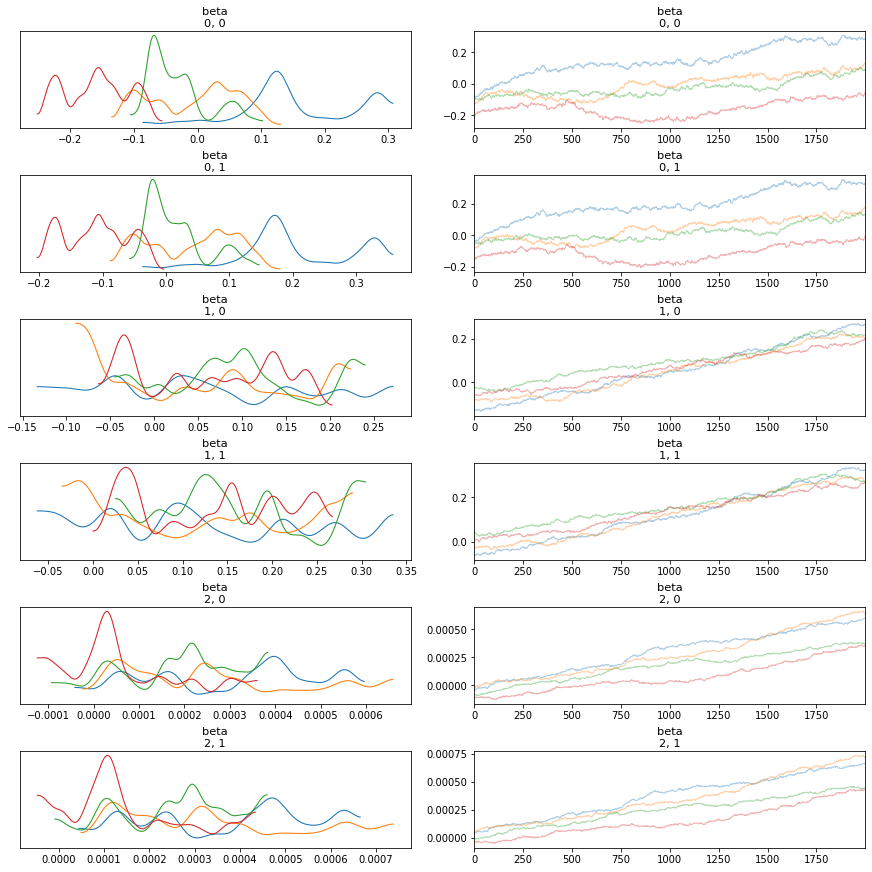

In [79]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0, sd=5, shape=2)
    beta = pm.Normal('beta', mu=0, sd=5, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
#     step = pm.Metropolis()
#     step = pm.HamiltonianMC()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train,md_probs)
# md_auc_train = roc_auc_score(yv_train, p,multi_class='ovr')
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'


## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]

ep=(1/(1+np.exp(-y_mu)))


dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})
dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)


    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'



df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)

f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'


In [80]:
df_results_r1

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.85   
1  Logistic Regression-tain/test dataste                 NA            0.87   
2  Logistic Regression-tain/test dataste                 NA            0.89   
3  Logistic Regression-tain/test dataste              Slice            0.87   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0           0.93           0.77          0.88   
1           0.95           0.88          0.96   
2           0.97           0.85          0.95   
3           0.95           0.57          0.94   

                                  model_details  
0                          LogisticRegression()  
1                          LogisticRegression()  
2                          LogisticRegression()  
3  <pymc3.model.Model object at 0x7fa191a6ae50>

#### Generic piror 2

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 25 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9537909194881422
Logistic Regression accuracy :  0.8621533442088092
Logistic Regression accuracy for test data :  0.5665399239543726
Logistic Regression AUC-ROC for test data :  0.9534763923230896


'0.86'

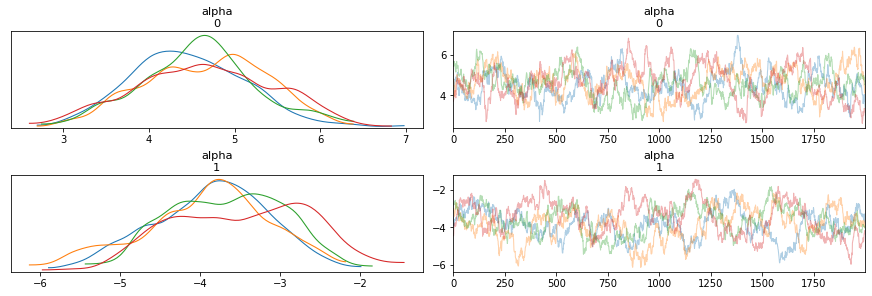

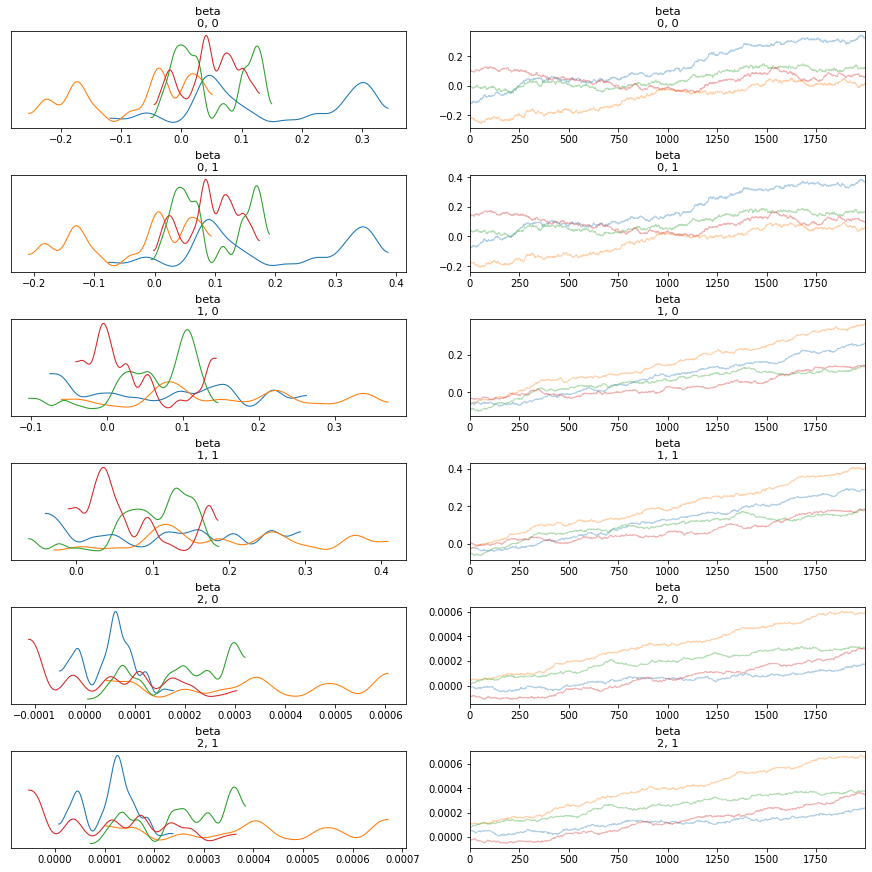

In [81]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
    beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])



## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]

ep=(1/(1+np.exp(-y_mu)))

dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})
dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)


    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

#### Using specific priors

array([[<AxesSubplot:title={'center':'Usage_kWh'}>,
        <AxesSubplot:title={'center':'Lagging_Current_Power_Factor'}>],
       [<AxesSubplot:title={'center':'NSM'}>, <AxesSubplot:>]],
      dtype=object)

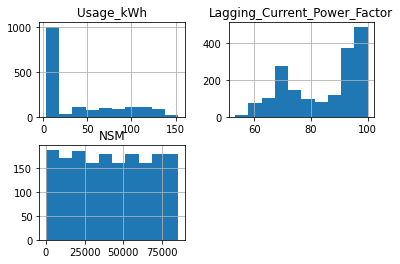

In [82]:
X.hist()

#### the features seem unifrom stable hence we can assume prior normal distribution

In [83]:
X.describe()

Usage_kWh  Lagging_Current_Power_Factor      NSM
count    1752.00                       1752.00  1752.00
mean       38.93                         84.93 42318.49
std        45.27                         13.23 25055.70
min         3.10                         53.26     0.00
25%         4.57                         71.57 20700.00
50%         5.20                         89.99 42300.00
75%        75.82                         96.42 63900.00
max       153.14                        100.00 85500.00

In [71]:
y.describe()

count   2000.00
mean       0.37
std        0.48
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        1.00
Name: stabf, dtype: float64

#### Specific prior 2: with means and standard deviations based on features mean

In [85]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0.5, sd=1, shape=2)
    beta = pm.Normal('beta', mu=100, sd=100, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]
ep=(1/(1+np.exp(-y_mu)))


dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})

dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 24 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [86]:
Xs.describe()

Usage_kWh  Lagging_Current_Power_Factor     NSM
count    1752.00                       1752.00 1752.00
mean        0.35                          0.23   -0.02
std         1.35                          0.70    1.00
min        -0.73                         -1.44   -1.71
25%        -0.68                         -0.48   -0.88
50%        -0.66                          0.50   -0.02
75%         1.45                          0.84    0.85
max         3.76                          1.03    1.71

### Now applying model on dataset with Standard Scalar transformation

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 28 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9537612481387971
Logistic Regression accuracy :  0.8727569331158238
Logistic Regression accuracy for test data :  0.9391634980988594
Logistic Regression AUC-ROC for test data :  0.9658689509007418


'0.87'

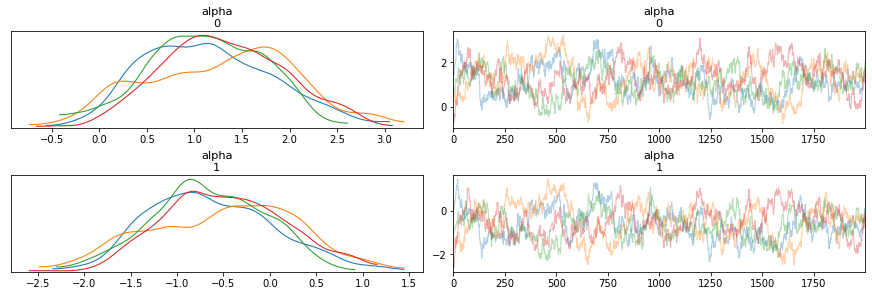

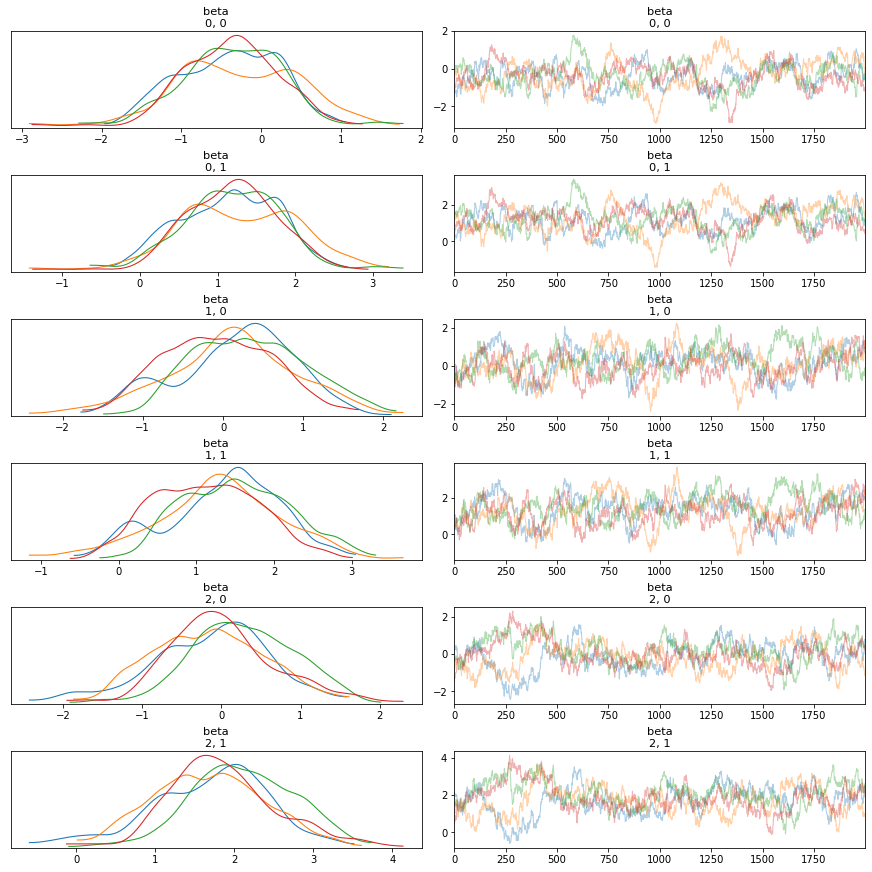

In [91]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
    beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xsv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xsv_test[:,0] + bet[1]*Xsv_test[:,1]+ bet[2]*Xsv_test[:,2]
ep=(1/(1+np.exp(-y_mu)))


dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})

dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'



df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

In [92]:
df_results_r1

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.85   
1  Logistic Regression-tain/test dataste                 NA            0.87   
2  Logistic Regression-tain/test dataste                 NA            0.89   
3  Logistic Regression-tain/test dataste              Slice            0.87   
4  Logistic Regression-tain/test dataste              Slice            0.86   
5  Logistic Regression-tain/test dataste              Slice            0.86   
6  Logistic Regression-tain/test dataste              Slice            0.87   
7  Logistic Regression-tain/test dataste              Slice            0.87   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0           0.93           0.77          0.88   
1           0.95           0.88          0.96   
2           0.97           0.85          0.95   
3           0.95           0.57          0.94   
4           0.95           0.57          0.95   
5           0.96           0.57          0.50   
6           0.95           0.91          0.93   
7           0.95           0.94          0.97   

                                  model_details  
0                          LogisticRegression()  
1                          LogisticRegression()  
2                          LogisticRegression()  
3  <pymc3.model.Model object at 0x7fa191a6ae50>  
4  <pymc3.model.Model object at 0x7fa14bf40d50>  
5  <pymc3.model.Model object at 0x7fa14ca9dd90>  
6  <pymc3.model.Model object at 0x7fa115244610>  
7  <pymc3.model.Model object at 0x7fa14dd7b990>

### Now applying model on dataset with log transformation

In [87]:
Xl.describe()

Usage_kWh  Lagging_Current_Power_Factor     NSM
count    1752.00                       1752.00 1752.00
mean        2.85                          4.44   10.27
std         1.35                          0.16    1.40
min         1.41                          3.99    0.00
25%         1.72                          4.28    9.94
50%         1.82                          4.51   10.65
75%         4.34                          4.58   11.07
max         5.04                          4.62   11.36

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 27 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9632075268121103
Logistic Regression accuracy :  0.8564437194127243
Logistic Regression accuracy for test data :  0.5665399239543726
Logistic Regression AUC-ROC for test data :  0.5


'0.86'

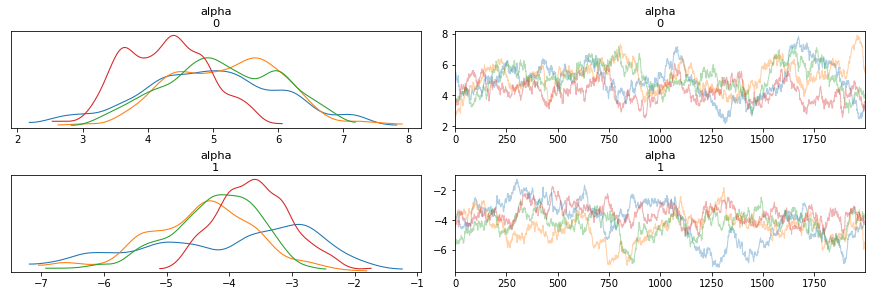

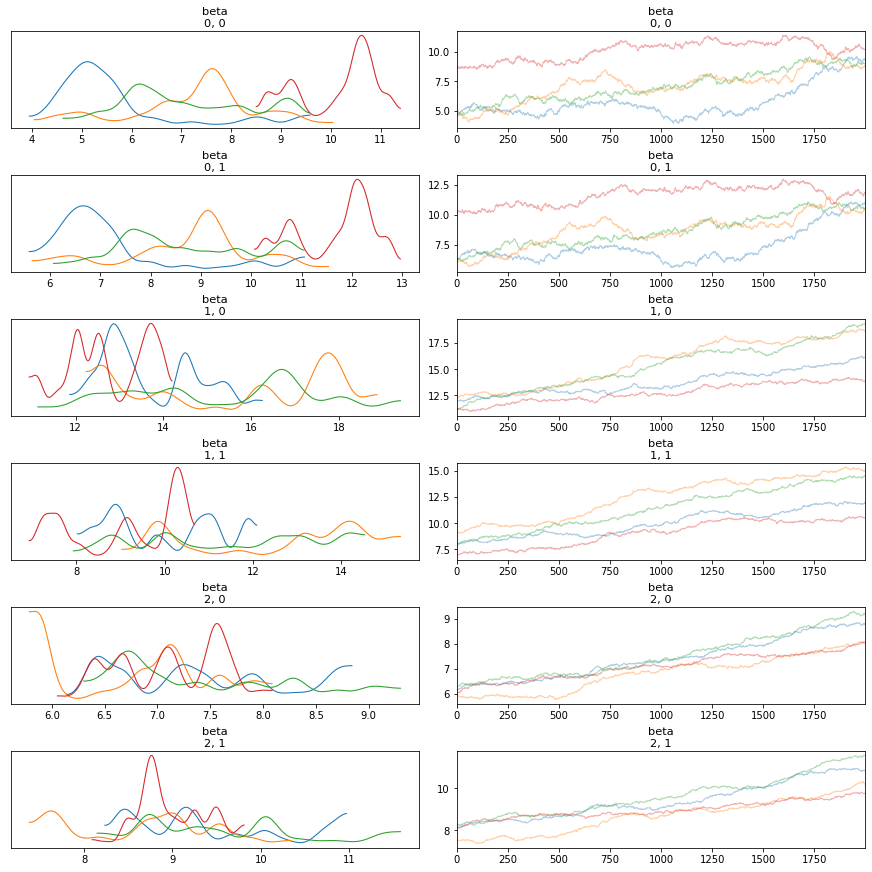

In [88]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
    beta = pm.Normal('beta', mu=8, sd=5, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xlv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xlv_test[:,0] + bet[1]*Xlv_test[:,1]+ bet[2]*Xlv_test[:,2]
ep=(1/(1+np.exp(-y_mu)))

# y_p=(ep)/(1-ep)

# y_p

dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})


# dy=pd.DataFrame({'test_y':yv_test,'predicted_y':y_p})
dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    # p_test=y_p
    # # p_test=np.array(p_test)
    # md_probs_test = p_test
    # md_auc_test = roc_auc_score(yv_test, md_probs_test)
    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'



df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

In [93]:
df_results_r1.tail()

model_name sampling/VI_method  Accuracy_train  \
3  Logistic Regression-tain/test dataste              Slice            0.87   
4  Logistic Regression-tain/test dataste              Slice            0.86   
5  Logistic Regression-tain/test dataste              Slice            0.86   
6  Logistic Regression-tain/test dataste              Slice            0.87   
7  Logistic Regression-tain/test dataste              Slice            0.87   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
3           0.95           0.57          0.94   
4           0.95           0.57          0.95   
5           0.96           0.57          0.50   
6           0.95           0.91          0.93   
7           0.95           0.94          0.97   

                                  model_details  
3  <pymc3.model.Model object at 0x7fa191a6ae50>  
4  <pymc3.model.Model object at 0x7fa14bf40d50>  
5  <pymc3.model.Model object at 0x7fa14ca9dd90>  
6  <pymc3.model.Model object at 0x7fa115244610>  
7  <pymc3.model.Model object at 0x7fa14dd7b990>

### From the results based on them we see that model with the specific prior on standard scalar transformation dataset performed best. the mean and sd based on dataset

#### We will use this model for further analysis

## Making a MCMC function for our best models

In [98]:
def model_mcmc(sampling):
    
    
    import theano as tt
    tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

    with pm.Model() as model_mclass:
        alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
        beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
        μ = pm.Deterministic('μ', alpha + pm.math.dot(Xsv_train, beta))
        θ = tt.tensor.nnet.softmax(μ)
        #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
        yl = pm.Categorical('yl', p=θ, observed=yv_train)
        
        
        if sampling == 'HMC':
            step = pm.HamiltonianMC()
            
        elif sampling == 'metropolis':
            step = pm.Metropolis()
            
        elif sampling == 'slice':
            step = pm.Slice()
            
        elif sampling == 'NUTS':
            step = pm.NUTS()
        

#         step = pm.Slice()
        trace_s = pm.sample(2000,step)
    #     trace_s = pm.sample(2000,step, tune=1000)

    #     trace_s = pm.sample(2000)

    data_pred = trace_s['μ'].mean(0)
    y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

    p=y_pred
    p=np.array(p)
    md_probs = p[:,1]
    md_auc_train = roc_auc_score(yv_train, md_probs)
    print( "Logistic Regression AUC-ROC : ", md_auc_train)

    accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
    print( "Logistic Regression accuracy : ", accuracy_train)


    az.plot_trace(trace_s, var_names=['alpha'])
    az.plot_trace(trace_s, var_names=['beta'])
    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



    ## Calculating the probs for y=1
    a=trace_s['alpha']
    a=np.mean(a,0)
    alph=a[1]

    b=trace_s['beta']
    b=np.mean(b,0)
    bet=b[:,1]

    y_mu = alph + bet[0]*Xsv_test[:,0] + bet[1]*Xsv_test[:,1]+ bet[2]*Xsv_test[:,2]
    ep=(1/(1+np.exp(-y_mu)))

    dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})

    dy.head()

    dy.replace([np.inf, -np.inf], np.nan, inplace=True)

    dy=dy.dropna()
    dy.shape

    try:

        md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
        # md_auc_test

        accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
        print( "Logistic Regression accuracy for test data : ",accuracy_test)

        print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)

    except:
        md_auc_test = 'NA'
        accuracy_test='NA'
        
    global df_results_r1


    df_results_r1= df_results_r1.append({'model_name':str(sampling)+' MLR-standard scalar-train/test datastet (S)',
                                         'sampling/VI_method':sampling,
                                         'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                         'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                         'model_details':model_mclass},ignore_index=True)


    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

    

    return(model_mclass)

## Making a function for Variational Inference

In [99]:
def model_vi(vi_method):
    
    vi=vi_method
    
    
    import theano as tt
    tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

    with pm.Model() as model_mclass:
        alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
        beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
        μ = pm.Deterministic('μ', alpha + pm.math.dot(Xsv_train, beta))
        θ = tt.tensor.nnet.softmax(μ)
        #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
        yl = pm.Categorical('yl', p=θ, observed=yv_train)

    print('for VI')
    with model_mclass:
        mean_field = pm.fit(method=vi_method) # VI
        

    trace_s=mean_field.sample(10000)    



    data_pred = trace_s['μ'].mean(0)
    y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

    p=y_pred
    p=np.array(p)
    md_probs = p[:,1]
    md_auc_train = roc_auc_score(yv_train, md_probs)
    print( "Logistic Regression AUC-ROC : ", md_auc_train)

    accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
    print( "Logistic Regression accuracy : ", accuracy_train)


    az.plot_trace(trace_s, var_names=['alpha'])
    az.plot_trace(trace_s, var_names=['beta'])
    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



    ## Calculating the probs for y=1
    a=trace_s['alpha']
    a=np.mean(a,0)
    alph=a[1]

    b=trace_s['beta']
    b=np.mean(b,0)
    bet=b[:,1]

    y_mu = alph + bet[0]*Xsv_test[:,0] + bet[1]*Xsv_test[:,1]+ bet[2]*Xsv_test[:,2]
    ep=(1/(1+np.exp(-y_mu)))

    # y_p=(ep)/(1-ep)

    # y_p

    dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})


    # dy=pd.DataFrame({'test_y':yv_test,'predicted_y':y_p})
    dy.head()

    dy.replace([np.inf, -np.inf], np.nan, inplace=True)

    dy=dy.dropna()
    dy.shape

    try:

        md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
        # md_auc_test

        accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
        print( "Logistic Regression accuracy for test data : ",accuracy_test)

        print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)

    except:
        md_auc_test = 'NA'
        accuracy_test='NA'
        
    global df_results_r1



    df_results_r1= df_results_r1.append({'model_name':str(vi_method)+' MLR-Robust-Nuts-train/test datastet (G)',
                                         'sampling/VI_method':vi_method,
                                         'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                         'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                         'model_details':model_mclass},ignore_index=True)


    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'
    
    
    
    return(model_mclass)

# MCMC differnet Sampling Methods

## 1 NUTS

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 55 seconds.


Logistic Regression AUC-ROC :  0.9537396689756371
Logistic Regression accuracy :  0.8727569331158238
Logistic Regression accuracy for test data :  0.876425855513308
Logistic Regression AUC-ROC for test data :  0.9619392440833627


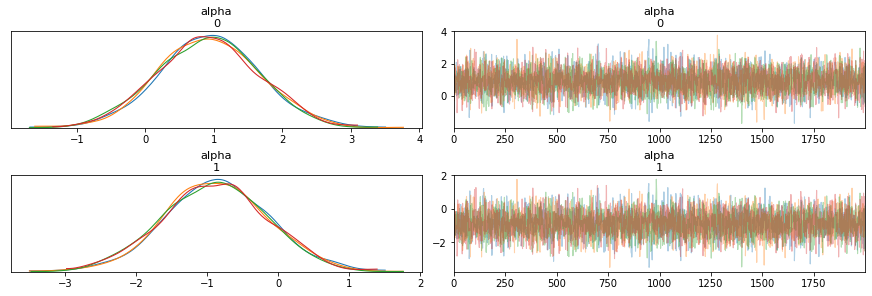

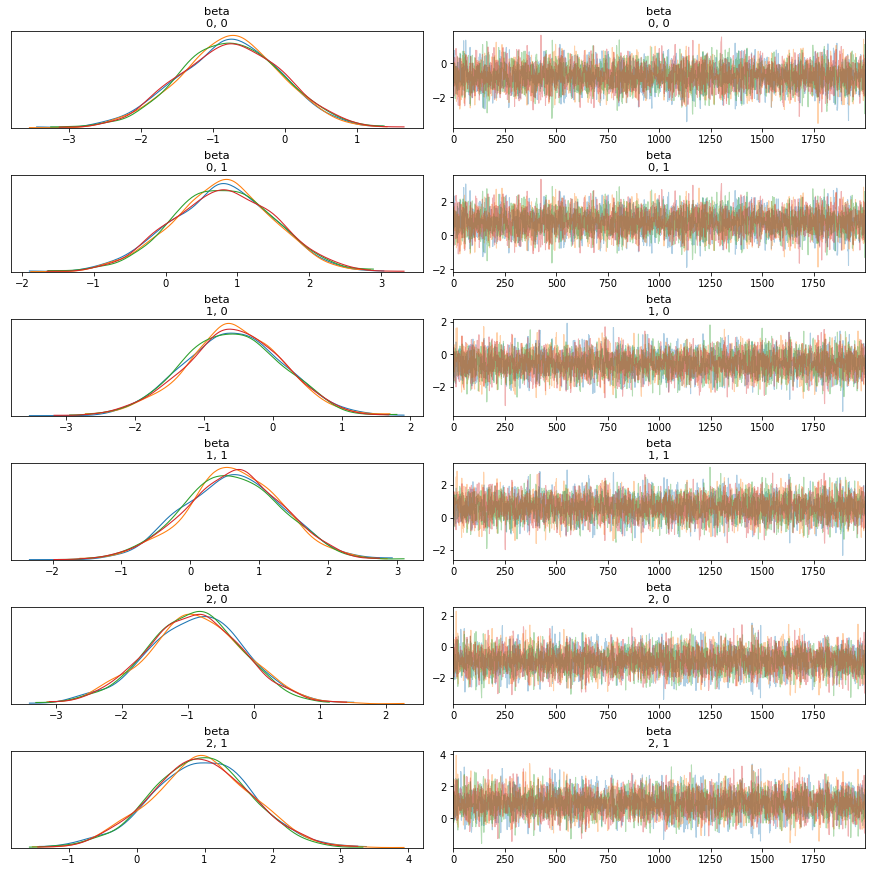

In [100]:
nuts=model_mcmc('NUTS')

In [101]:
model_mclass

In [102]:
df_results_r1.tail()

model_name sampling/VI_method  \
4             Logistic Regression-tain/test dataste              Slice   
5             Logistic Regression-tain/test dataste              Slice   
6             Logistic Regression-tain/test dataste              Slice   
7             Logistic Regression-tain/test dataste              Slice   
8  NUTS MLR-standard scalar-train/test datastet (S)               NUTS   

   Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
4            0.86           0.95           0.57          0.95   
5            0.86           0.96           0.57          0.50   
6            0.87           0.95           0.91          0.93   
7            0.87           0.95           0.94          0.97   
8            0.87           0.95           0.88          0.96   

                                  model_details  
4  <pymc3.model.Model object at 0x7fa14bf40d50>  
5  <pymc3.model.Model object at 0x7fa14ca9dd90>  
6  <pymc3.model.Model object at 0x7fa115244610>  
7  <pymc3.model.Model object at 0x7fa14dd7b990>  
8  <pymc3.model.Model object at 0x7fa0ff711910>

## HMC

Multiprocess sampling (4 chains in 4 jobs)
HamiltonianMC: [beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 24 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7659791686830508, but should be close to 0.65. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7885573740033548, but should be close to 0.65. Try to increase the number of tuning steps.


Logistic Regression AUC-ROC :  0.9537396689756372
Logistic Regression accuracy :  0.8735725938009788
Logistic Regression accuracy for test data :  0.8745247148288974
Logistic Regression AUC-ROC for test data :  0.9617626280466267


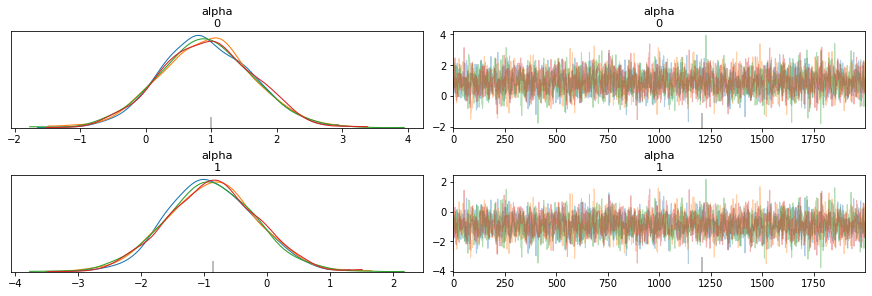

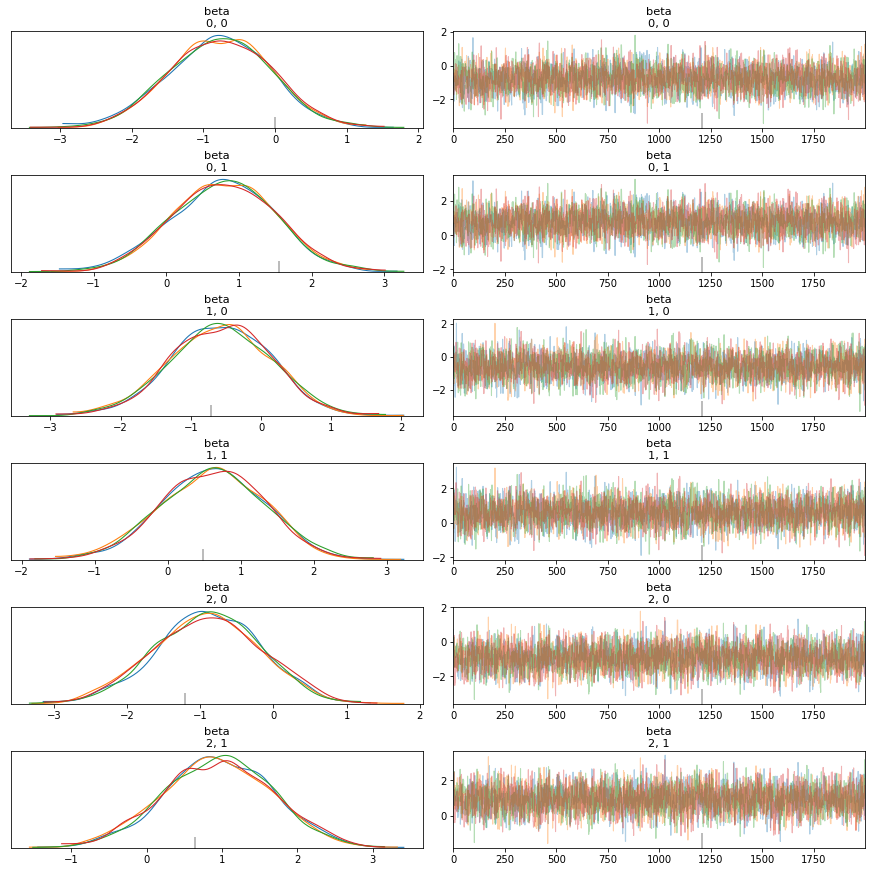

In [103]:
hmc=model_mcmc('HMC')

In [104]:
model_mclass

## Metrolpis

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta]
>Metropolis: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9537504585572171
Logistic Regression accuracy :  0.8727569331158238
Logistic Regression accuracy for test data :  0.8783269961977186
Logistic Regression AUC-ROC for test data :  0.9613505239609089


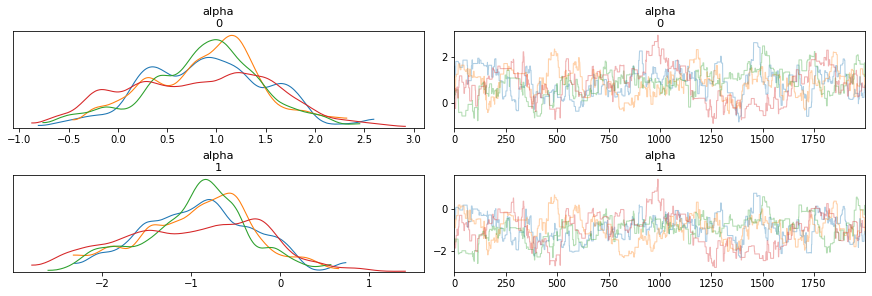

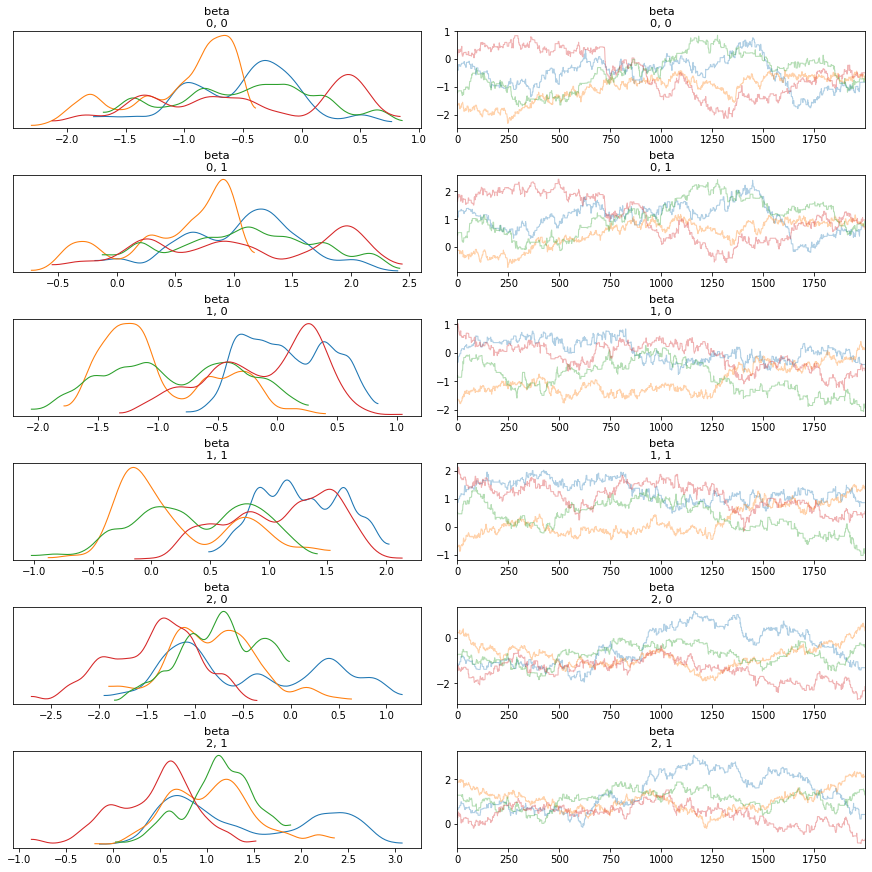

In [105]:
metrolpis=model_mcmc('metropolis')

In [106]:
model_mclass

In [107]:
df_results_r1.tail()

model_name sampling/VI_method  \
6               Logistic Regression-tain/test dataste              Slice   
7               Logistic Regression-tain/test dataste              Slice   
8    NUTS MLR-standard scalar-train/test datastet (S)               NUTS   
9     HMC MLR-standard scalar-train/test datastet (S)                HMC   
10  metropolis MLR-standard scalar-train/test data...         metropolis   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
6             0.87           0.95           0.91          0.93   
7             0.87           0.95           0.94          0.97   
8             0.87           0.95           0.88          0.96   
9             0.87           0.95           0.87          0.96   
10            0.87           0.95           0.88          0.96   

                                   model_details  
6   <pymc3.model.Model object at 0x7fa115244610>  
7   <pymc3.model.Model object at 0x7fa14dd7b990>  
8   <pymc3.model.Model object at 0x7fa0ff711910>  
9   <pymc3.model.Model object at 0x7fa1431847d0>  
10  <pymc3.model.Model object at 0x7fa143174b90>

## Slice

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 30 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9537477611618221
Logistic Regression accuracy :  0.8727569331158238
Logistic Regression accuracy for test data :  0.935361216730038
Logistic Regression AUC-ROC for test data :  0.9610414458966208


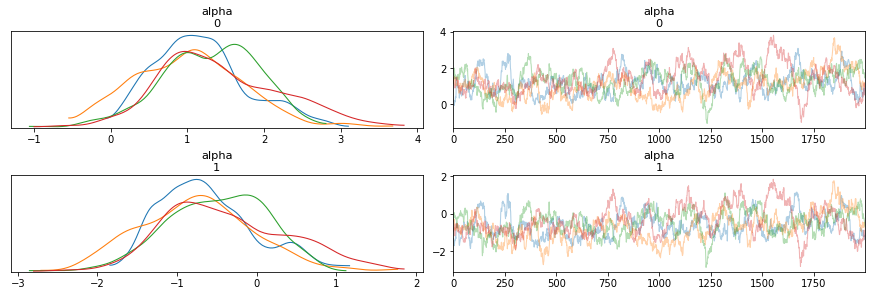

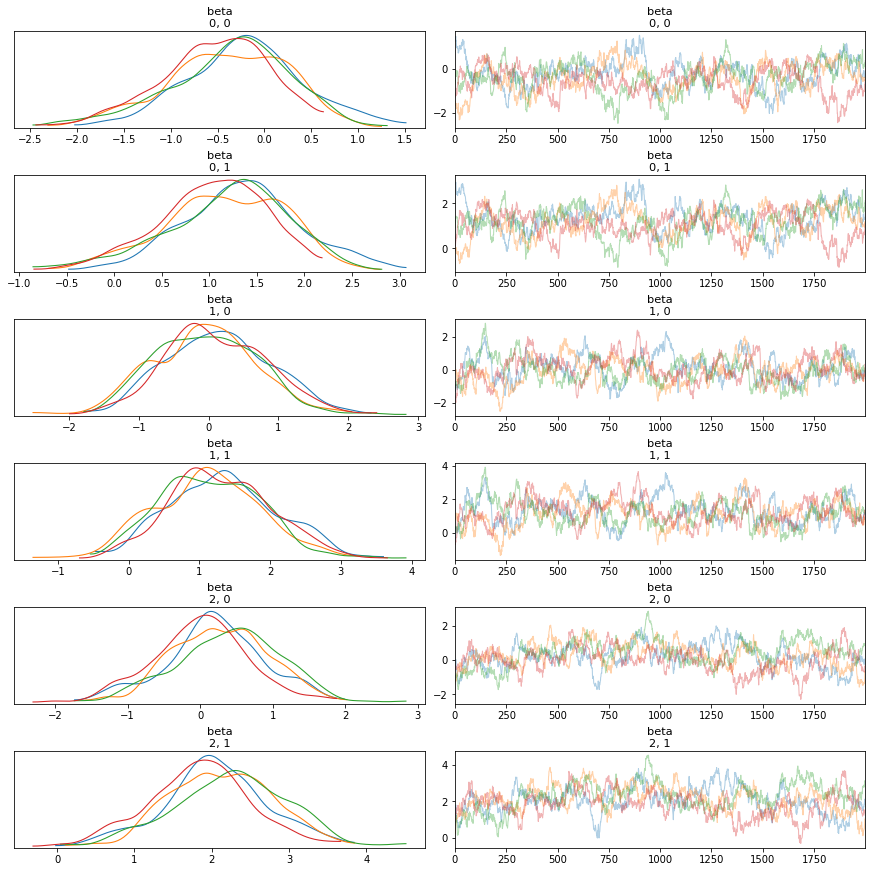

In [108]:
slice= model_mcmc('slice')

# Variational Inference Methods

## ADVI

for VI


Finished [100%]: Average Loss = 359.68


Logistic Regression AUC-ROC :  0.953715392417082
Logistic Regression accuracy :  0.8694942903752039
Logistic Regression accuracy for test data :  0.8726235741444867
Logistic Regression AUC-ROC for test data :  0.9593194395384435


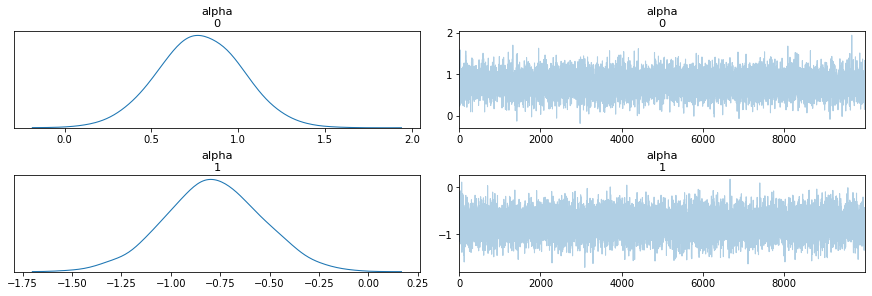

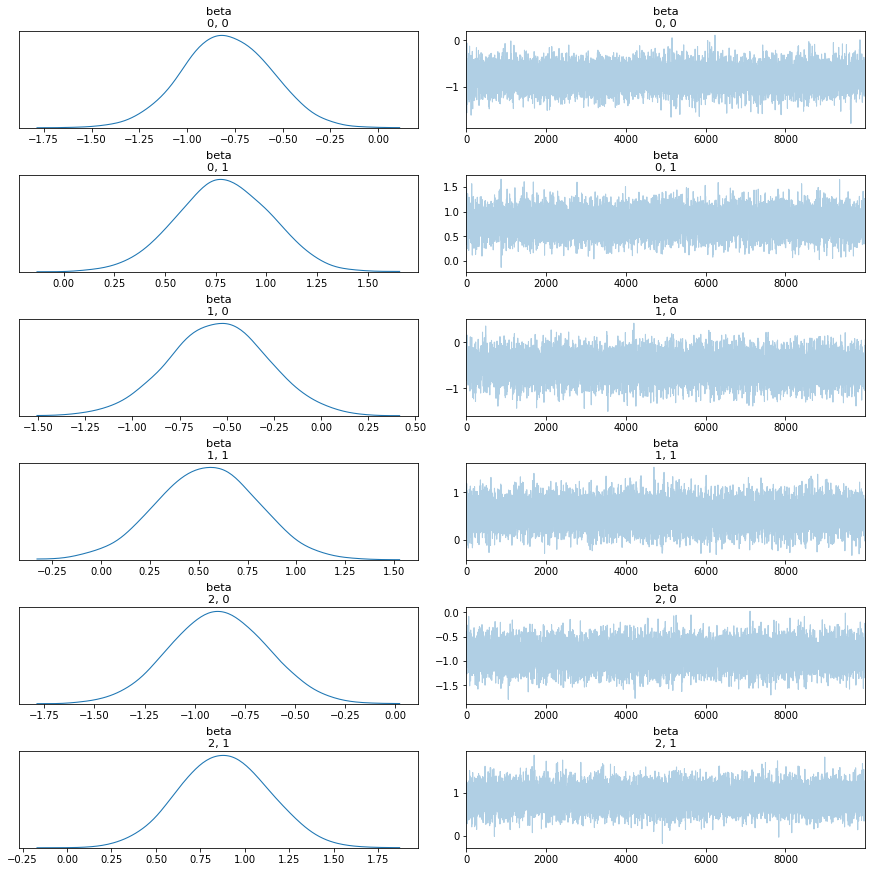

In [109]:
advi=model_vi('advi')

## fullrank advi

for VI


Finished [100%]: Average Loss = 335.97


Logistic Regression AUC-ROC :  0.9537396689756371
Logistic Regression accuracy :  0.8735725938009788
Logistic Regression accuracy for test data :  0.8745247148288974
Logistic Regression AUC-ROC for test data :  0.9615712940068291


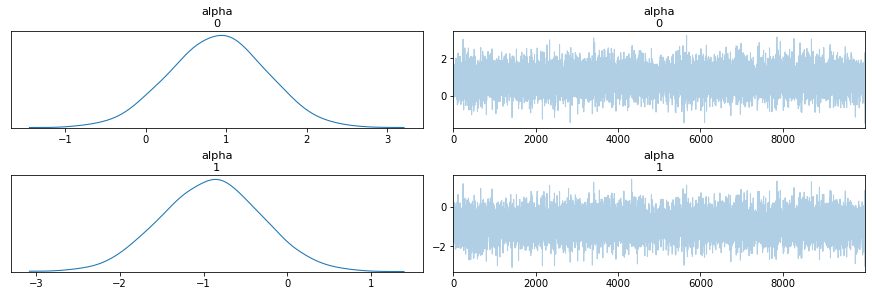

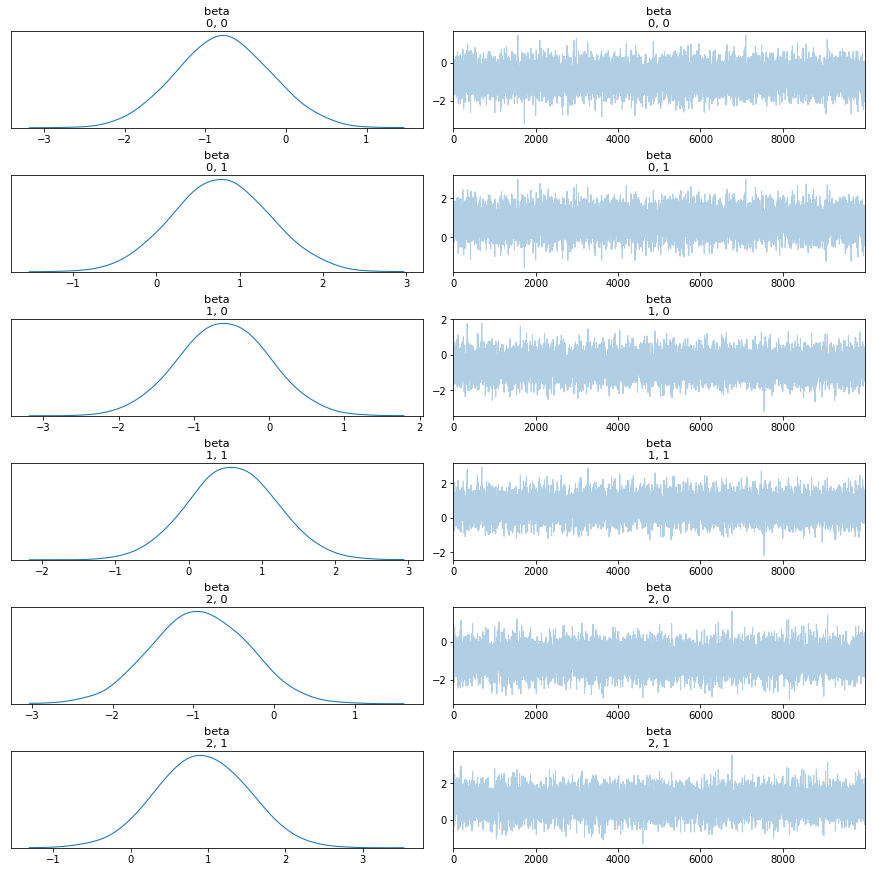

In [110]:
fr_advi=model_vi('fullrank_advi')

## svgd

for VI


Logistic Regression AUC-ROC :  0.9537423663710322
Logistic Regression accuracy :  0.8735725938009788
Logistic Regression accuracy for test data :  0.8821292775665399
Logistic Regression AUC-ROC for test data :  0.9623366301660191


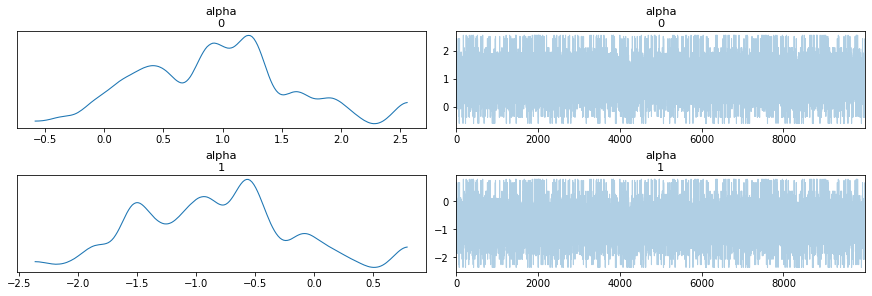

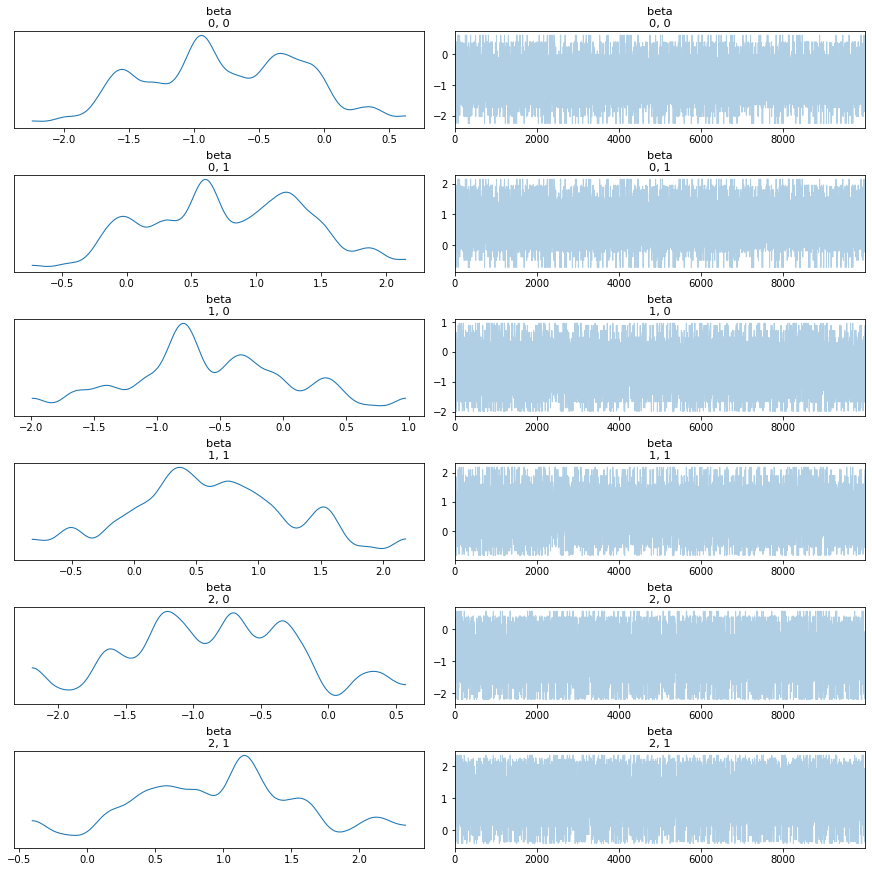

In [111]:
svgd= model_vi('svgd')

In [112]:
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', 500)

In [113]:
df_results_r1

model_name sampling/VI_method  \
0                    Logistic Regression-tain/test dataste                 NA   
1                    Logistic Regression-tain/test dataste                 NA   
2                    Logistic Regression-tain/test dataste                 NA   
3                    Logistic Regression-tain/test dataste              Slice   
4                    Logistic Regression-tain/test dataste              Slice   
5                    Logistic Regression-tain/test dataste              Slice   
6                    Logistic Regression-tain/test dataste              Slice   
7                    Logistic Regression-tain/test dataste              Slice   
8         NUTS MLR-standard scalar-train/test datastet (S)               NUTS   
9          HMC MLR-standard scalar-train/test datastet (S)                HMC   
10  metropolis MLR-standard scalar-train/test datastet (S)         metropolis   
11       slice MLR-standard scalar-train/test datastet (S)              slice   
12            advi MLR-Robust-Nuts-train/test datastet (G)               advi   
13   fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
14            svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0             0.85           0.93           0.77          0.88   
1             0.87           0.95           0.88          0.96   
2             0.89           0.97           0.85          0.95   
3             0.87           0.95           0.57          0.94   
4             0.86           0.95           0.57          0.95   
5             0.86           0.96           0.57          0.50   
6             0.87           0.95           0.91          0.93   
7             0.87           0.95           0.94          0.97   
8             0.87           0.95           0.88          0.96   
9             0.87           0.95           0.87          0.96   
10            0.87           0.95           0.88          0.96   
11            0.87           0.95           0.94          0.96   
12            0.87           0.95           0.87          0.96   
13            0.87           0.95           0.87          0.96   
14            0.87           0.95           0.88          0.96   

                                   model_details  
0                           LogisticRegression()  
1                           LogisticRegression()  
2                           LogisticRegression()  
3   <pymc3.model.Model object at 0x7fa191a6ae50>  
4   <pymc3.model.Model object at 0x7fa14bf40d50>  
5   <pymc3.model.Model object at 0x7fa14ca9dd90>  
6   <pymc3.model.Model object at 0x7fa115244610>  
7   <pymc3.model.Model object at 0x7fa14dd7b990>  
8   <pymc3.model.Model object at 0x7fa0ff711910>  
9   <pymc3.model.Model object at 0x7fa1431847d0>  
10  <pymc3.model.Model object at 0x7fa143174b90>  
11  <pymc3.model.Model object at 0x7fa14d6e3d10>  
12  <pymc3.model.Model object at 0x7fa1145d9750>  
13  <pymc3.model.Model object at 0x7fa1430c8bd0>  
14  <pymc3.model.Model object at 0x7fa114724510>

In [115]:
df_results_r1

model_name sampling/VI_method  \
0                    Logistic Regression-tain/test dataste                 NA   
1                    Logistic Regression-tain/test dataste                 NA   
2                    Logistic Regression-tain/test dataste                 NA   
3                    Logistic Regression-tain/test dataste              Slice   
4                    Logistic Regression-tain/test dataste              Slice   
5                    Logistic Regression-tain/test dataste              Slice   
6                    Logistic Regression-tain/test dataste              Slice   
7                    Logistic Regression-tain/test dataste              Slice   
8         NUTS MLR-standard scalar-train/test datastet (S)               NUTS   
9          HMC MLR-standard scalar-train/test datastet (S)                HMC   
10  metropolis MLR-standard scalar-train/test datastet (S)         metropolis   
11       slice MLR-standard scalar-train/test datastet (S)              slice   
12            advi MLR-Robust-Nuts-train/test datastet (G)               advi   
13   fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
14            svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0             0.85           0.93           0.77          0.88   
1             0.87           0.95           0.88          0.96   
2             0.89           0.97           0.85          0.95   
3             0.87           0.95           0.57          0.94   
4             0.86           0.95           0.57          0.95   
5             0.86           0.96           0.57          0.50   
6             0.87           0.95           0.91          0.93   
7             0.87           0.95           0.94          0.97   
8             0.87           0.95           0.88          0.96   
9             0.87           0.95           0.87          0.96   
10            0.87           0.95           0.88          0.96   
11            0.87           0.95           0.94          0.96   
12            0.87           0.95           0.87          0.96   
13            0.87           0.95           0.87          0.96   
14            0.87           0.95           0.88          0.96   

                                   model_details  
0                           LogisticRegression()  
1                           LogisticRegression()  
2                           LogisticRegression()  
3   <pymc3.model.Model object at 0x7fa191a6ae50>  
4   <pymc3.model.Model object at 0x7fa14bf40d50>  
5   <pymc3.model.Model object at 0x7fa14ca9dd90>  
6   <pymc3.model.Model object at 0x7fa115244610>  
7   <pymc3.model.Model object at 0x7fa14dd7b990>  
8   <pymc3.model.Model object at 0x7fa0ff711910>  
9   <pymc3.model.Model object at 0x7fa1431847d0>  
10  <pymc3.model.Model object at 0x7fa143174b90>  
11  <pymc3.model.Model object at 0x7fa14d6e3d10>  
12  <pymc3.model.Model object at 0x7fa1145d9750>  
13  <pymc3.model.Model object at 0x7fa1430c8bd0>  
14  <pymc3.model.Model object at 0x7fa114724510>

In [116]:
df_results_r1_a=df_results_r1.sort_values('Accuracy_test',ascending=False)

df_results_r1_a


model_name sampling/VI_method  \
7                    Logistic Regression-tain/test dataste              Slice   
11       slice MLR-standard scalar-train/test datastet (S)              slice   
6                    Logistic Regression-tain/test dataste              Slice   
14            svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   
10  metropolis MLR-standard scalar-train/test datastet (S)         metropolis   
1                    Logistic Regression-tain/test dataste                 NA   
8         NUTS MLR-standard scalar-train/test datastet (S)               NUTS   
9          HMC MLR-standard scalar-train/test datastet (S)                HMC   
13   fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
12            advi MLR-Robust-Nuts-train/test datastet (G)               advi   
2                    Logistic Regression-tain/test dataste                 NA   
0                    Logistic Regression-tain/test dataste                 NA   
3                    Logistic Regression-tain/test dataste              Slice   
4                    Logistic Regression-tain/test dataste              Slice   
5                    Logistic Regression-tain/test dataste              Slice   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
7             0.87           0.95           0.94          0.97   
11            0.87           0.95           0.94          0.96   
6             0.87           0.95           0.91          0.93   
14            0.87           0.95           0.88          0.96   
10            0.87           0.95           0.88          0.96   
1             0.87           0.95           0.88          0.96   
8             0.87           0.95           0.88          0.96   
9             0.87           0.95           0.87          0.96   
13            0.87           0.95           0.87          0.96   
12            0.87           0.95           0.87          0.96   
2             0.89           0.97           0.85          0.95   
0             0.85           0.93           0.77          0.88   
3             0.87           0.95           0.57          0.94   
4             0.86           0.95           0.57          0.95   
5             0.86           0.96           0.57          0.50   

                                   model_details  
7   <pymc3.model.Model object at 0x7fa14dd7b990>  
11  <pymc3.model.Model object at 0x7fa14d6e3d10>  
6   <pymc3.model.Model object at 0x7fa115244610>  
14  <pymc3.model.Model object at 0x7fa114724510>  
10  <pymc3.model.Model object at 0x7fa143174b90>  
1                           LogisticRegression()  
8   <pymc3.model.Model object at 0x7fa0ff711910>  
9   <pymc3.model.Model object at 0x7fa1431847d0>  
13  <pymc3.model.Model object at 0x7fa1430c8bd0>  
12  <pymc3.model.Model object at 0x7fa1145d9750>  
2                           LogisticRegression()  
0                           LogisticRegression()  
3   <pymc3.model.Model object at 0x7fa191a6ae50>  
4   <pymc3.model.Model object at 0x7fa14bf40d50>  
5   <pymc3.model.Model object at 0x7fa14ca9dd90>

In [117]:
df_results_r1_a=df_results_r1.sort_values('AUC-ROC_test',ascending=False)

df_results_r1_a

model_name sampling/VI_method  \
7                    Logistic Regression-tain/test dataste              Slice   
14            svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   
8         NUTS MLR-standard scalar-train/test datastet (S)               NUTS   
9          HMC MLR-standard scalar-train/test datastet (S)                HMC   
13   fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
1                    Logistic Regression-tain/test dataste                 NA   
10  metropolis MLR-standard scalar-train/test datastet (S)         metropolis   
11       slice MLR-standard scalar-train/test datastet (S)              slice   
12            advi MLR-Robust-Nuts-train/test datastet (G)               advi   
4                    Logistic Regression-tain/test dataste              Slice   
2                    Logistic Regression-tain/test dataste                 NA   
3                    Logistic Regression-tain/test dataste              Slice   
6                    Logistic Regression-tain/test dataste              Slice   
0                    Logistic Regression-tain/test dataste                 NA   
5                    Logistic Regression-tain/test dataste              Slice   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
7             0.87           0.95           0.94          0.97   
14            0.87           0.95           0.88          0.96   
8             0.87           0.95           0.88          0.96   
9             0.87           0.95           0.87          0.96   
13            0.87           0.95           0.87          0.96   
1             0.87           0.95           0.88          0.96   
10            0.87           0.95           0.88          0.96   
11            0.87           0.95           0.94          0.96   
12            0.87           0.95           0.87          0.96   
4             0.86           0.95           0.57          0.95   
2             0.89           0.97           0.85          0.95   
3             0.87           0.95           0.57          0.94   
6             0.87           0.95           0.91          0.93   
0             0.85           0.93           0.77          0.88   
5             0.86           0.96           0.57          0.50   

                                   model_details  
7   <pymc3.model.Model object at 0x7fa14dd7b990>  
14  <pymc3.model.Model object at 0x7fa114724510>  
8   <pymc3.model.Model object at 0x7fa0ff711910>  
9   <pymc3.model.Model object at 0x7fa1431847d0>  
13  <pymc3.model.Model object at 0x7fa1430c8bd0>  
1                           LogisticRegression()  
10  <pymc3.model.Model object at 0x7fa143174b90>  
11  <pymc3.model.Model object at 0x7fa14d6e3d10>  
12  <pymc3.model.Model object at 0x7fa1145d9750>  
4   <pymc3.model.Model object at 0x7fa14bf40d50>  
2                           LogisticRegression()  
3   <pymc3.model.Model object at 0x7fa191a6ae50>  
6   <pymc3.model.Model object at 0x7fa115244610>  
0                           LogisticRegression()  
5   <pymc3.model.Model object at 0x7fa14ca9dd90>

In [118]:
# save the final data
df_results_r1.to_csv('df_results_c2.csv',index=False)

## Conclusion

#### We can see that both MCMC and VI models have performed better 
#### Also we see the performance of MCMC is at par and a bit better than normal Logistic Regression
#### Slice Sampling method and SVGD methid gave best result in MCMC model